In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
# Assuming X and y are already defined
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
import os
import pickle

In [4]:
data= pd.read_csv("Downloads/fake_job_postings 2.csv")

In [5]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


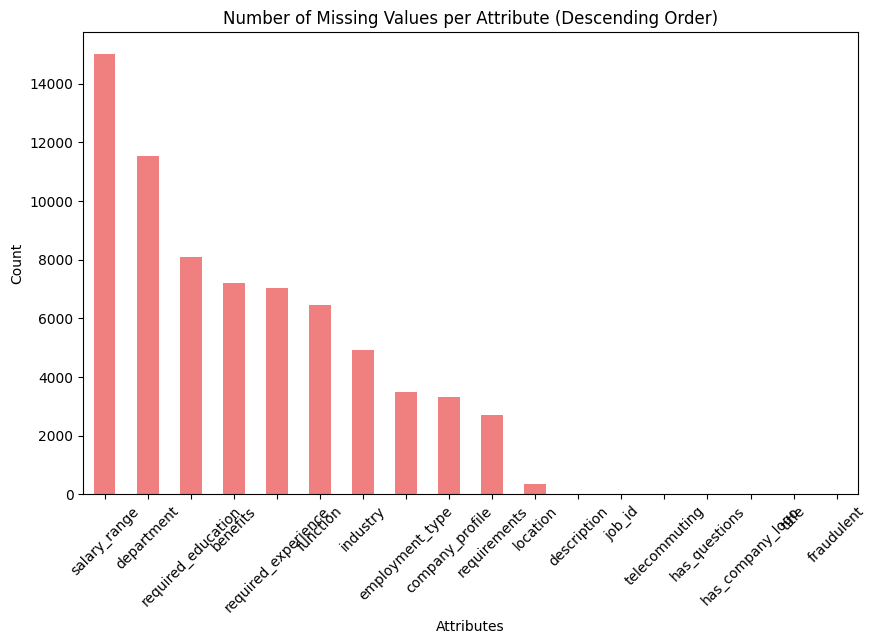

salary_range           15012
department             11547
required_education      8105
benefits                7212
required_experience     7050
function                6455
industry                4903
employment_type         3471
company_profile         3308
requirements            2696
location                 346
description                1
job_id                     0
telecommuting              0
has_questions              0
has_company_logo           0
title                      0
fraudulent                 0
dtype: int64

In [7]:
# Assuming 'data' is the original unimputed dataset
# Get the count of missing values for each column
missing_values_counts = data.isna().sum()

# Sort the missing values in descending order
missing_values_counts_sorted = missing_values_counts.sort_values(ascending=False)

# Plot the bar plot for missing values
plt.figure(figsize=(10, 6))
missing_values_counts_sorted.plot(kind='bar', color='lightcoral')
plt.title('Number of Missing Values per Attribute (Descending Order)')
plt.ylabel('Count')
plt.xlabel('Attributes')
plt.xticks(rotation=45)
plt.show()

# Display the sorted missing values counts
missing_values_counts_sorted


In [8]:
data.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [9]:
for column in data.columns:
    print(f"Column '{column}' has data type: {data[column].dtype} and has {data[column].nunique()} values")

Column 'job_id' has data type: int64 and has 17880 values
Column 'title' has data type: object and has 11231 values
Column 'location' has data type: object and has 3105 values
Column 'department' has data type: object and has 1337 values
Column 'salary_range' has data type: object and has 874 values
Column 'company_profile' has data type: object and has 1709 values
Column 'description' has data type: object and has 14801 values
Column 'requirements' has data type: object and has 11967 values
Column 'benefits' has data type: object and has 6204 values
Column 'telecommuting' has data type: int64 and has 2 values
Column 'has_company_logo' has data type: int64 and has 2 values
Column 'has_questions' has data type: int64 and has 2 values
Column 'employment_type' has data type: object and has 5 values
Column 'required_experience' has data type: object and has 7 values
Column 'required_education' has data type: object and has 13 values
Column 'industry' has data type: object and has 131 value

In [10]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.drop(columns="job_id", inplace=True)

In [267]:
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [13]:
#data_clean = data.copy()
# Step 1: Define the imputer that returns a DataFrame
# Fill missing values with 'Unknown'
data_clean=data.copy()
data_clean.fillna(value='Unknown', inplace=True)

In [14]:
data_clean.isna().sum()

title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [15]:
unique_values = data_clean.nunique()
print(unique_values)


title                  11231
location                3106
department              1337
salary_range             875
company_profile         1710
description            14802
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            6
required_experience        8
required_education        14
industry                 132
function                  38
fraudulent                 2
dtype: int64


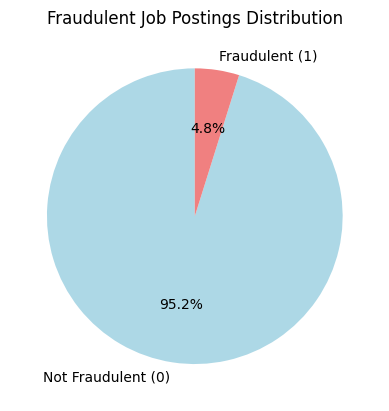

In [16]:
fraud_counts = data_clean['fraudulent'].value_counts()

# Plot pie chart
plt.figure()
plt.pie(fraud_counts, labels=['Not Fraudulent (0)', 'Fraudulent (1)'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Fraudulent Job Postings Distribution')
plt.show()

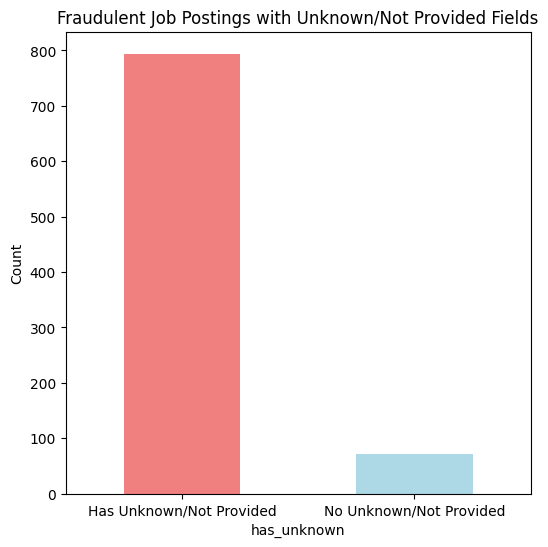

has_unknown
True     794
False     72
Name: count, dtype: int64

In [17]:
columns_to_check = ['location', 'salary_range', 'department', 'company_profile', 'description', 'requirements', 
                    'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']

# Create a new column 'has_unknown' to indicate if any column in the row has 'Unknown' or 'Not Provided'
data_clean['has_unknown'] = data_clean[columns_to_check].apply(lambda row: any(val in ['Unknown', 'Not Provided'] for val in row), axis=1)

# Filter rows that are fraudulent (fraudulent == 1)
fraudulent_data = data_clean[data_clean['fraudulent'] == 1]

# Count how many fraudulent rows have 'Unknown' or 'Not Provided' in any column
fraud_with_unknown = fraudulent_data['has_unknown'].value_counts()

# Plot the bar plot
plt.figure(figsize=(6, 6))
fraud_with_unknown.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.xticks([0, 1], ['Has Unknown/Not Provided', 'No Unknown/Not Provided'], rotation=0)
plt.title('Fraudulent Job Postings with Unknown/Not Provided Fields')
plt.ylabel('Count')
plt.show()

# Display the counts
fraud_with_unknown

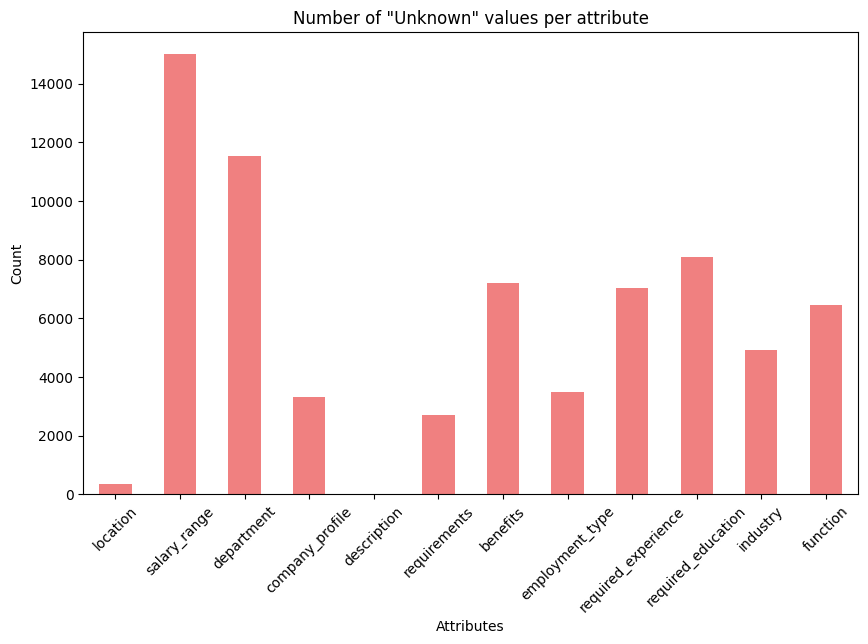

location                 346
salary_range           15012
department             11548
company_profile         3308
description                1
requirements            2696
benefits                7212
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
dtype: int64

In [18]:
# Get the count of 'Unknown' or 'Not Provided' for each column
unknown_counts = data_clean[columns_to_check].apply(lambda col: col.isin(['Unknown', 'Not Provided']).sum())

# Plot the bar plot
plt.figure(figsize=(10, 6))
unknown_counts.plot(kind='bar', color='lightcoral')
plt.title('Number of "Unknown" values per attribute')
plt.ylabel('Count')
plt.xlabel('Attributes')
plt.xticks(rotation=45)
plt.show()

# Display the counts
unknown_counts

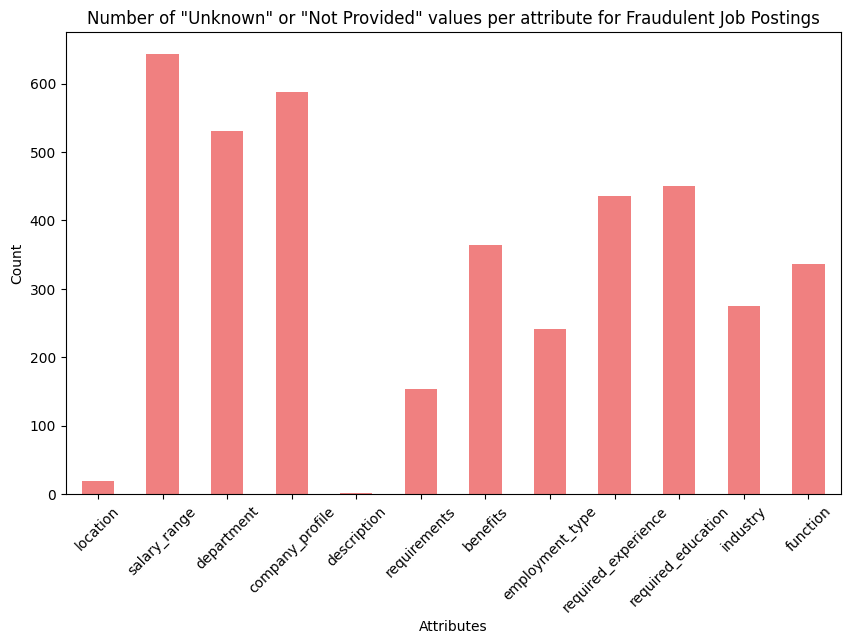

location                19
salary_range           643
department             531
company_profile        587
description              1
requirements           154
benefits               364
employment_type        241
required_experience    435
required_education     451
industry               275
function               337
dtype: int64

In [19]:
# Filter the rows where 'fraudulent' is 1
fraudulent_data = data_clean[data_clean['fraudulent'] == 1]

# Get the count of 'Unknown' or 'Not Provided' for each column, but only for fraudulent rows
fraudulent_unknown_counts = fraudulent_data[columns_to_check].apply(lambda col: col.isin(['Unknown', 'Not Provided']).sum())

# Plot the bar plot for fraudulent rows
plt.figure(figsize=(10, 6))
fraudulent_unknown_counts.plot(kind='bar', color='lightcoral')
plt.title('Number of "Unknown" or "Not Provided" values per attribute for Fraudulent Job Postings')
plt.ylabel('Count')
plt.xlabel('Attributes')
plt.xticks(rotation=45)
plt.show()

# Display the counts
fraudulent_unknown_counts

In [20]:
#sample cell to be dropped later
from sklearn.feature_extraction.text import TfidfVectorizer

text_data = data_clean['benefits']


tfidf = TfidfVectorizer(max_features=10, stop_words='english')


tfidf_matrix = tfidf.fit_transform(text_data)


tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())


print(tfidf_df)

            amp  benefits   company  competitive      paid   salary      team  \
0      0.000000       0.0  0.000000     0.000000  0.000000  0.00000  0.000000   
1      0.000000       0.0  0.000000     0.000000  0.000000  0.00000  1.000000   
2      0.000000       0.0  0.000000     0.000000  0.000000  0.00000  0.000000   
3      0.000000       0.0  0.000000     0.000000  0.000000  0.00000  0.000000   
4      0.000000       1.0  0.000000     0.000000  0.000000  0.00000  0.000000   
...         ...       ...       ...          ...       ...      ...       ...   
17875  0.000000       0.0  0.000000     0.000000  0.000000  0.00000  0.154708   
17876  0.807623       0.0  0.332169     0.000000  0.368692  0.00000  0.000000   
17877  0.000000       0.0  0.000000     0.000000  0.000000  0.00000  0.000000   
17878  0.000000       0.0  0.000000     0.557515  0.000000  0.60435  0.000000   
17879  0.000000       0.0  0.000000     0.000000  0.000000  0.00000  0.000000   

       time  unknown      w

In [21]:
data_clean.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'has_unknown'],
      dtype='object')

In [22]:


# Function to get top N most frequent words
def get_top_words(text_series, stop_words=None, top_n=50):
    # If stop_words are not provided, use an empty list
    if stop_words is None:
        stop_words = []

    # Combine all text in the series
    all_text = ' '.join(text_series)
    
    # Tokenize the text and count word frequencies
    words = all_text.split()
    words = [word.lower() for word in words if word.lower() not in stop_words]
    
    # Count the most common words
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

In [23]:
# Descriptive columns to process
descriptive_columns = ['company_profile', 'description', 'requirements', 'benefits']


In [24]:
# Split the data into fraudulent and non-fraudulent
fraudulent_df = data_clean[data_clean['fraudulent'] == 1]
non_fraudulent_df = data_clean[data_clean['fraudulent'] == 0]

# Combine the descriptive columns into one text column for both datasets
fraudulent_text = fraudulent_df[descriptive_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
non_fraudulent_text = non_fraudulent_df[descriptive_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Get the top 20 most frequent words for fraudulent and non-fraudulent postings
top_fraudulent_words = get_top_words(fraudulent_text, stop_words=ENGLISH_STOP_WORDS)
top_non_fraudulent_words = get_top_words(non_fraudulent_text, stop_words=ENGLISH_STOP_WORDS)

# Convert to DataFrame for easy plotting
fraudulent_df = pd.DataFrame(top_fraudulent_words, columns=['Word', 'Frequency'])
non_fraudulent_df = pd.DataFrame(top_non_fraudulent_words, columns=['Word', 'Frequency'])

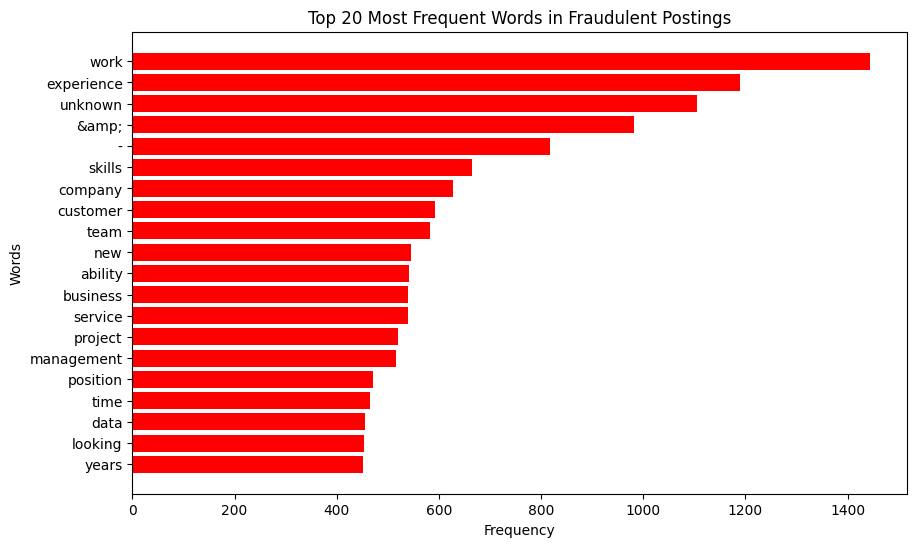

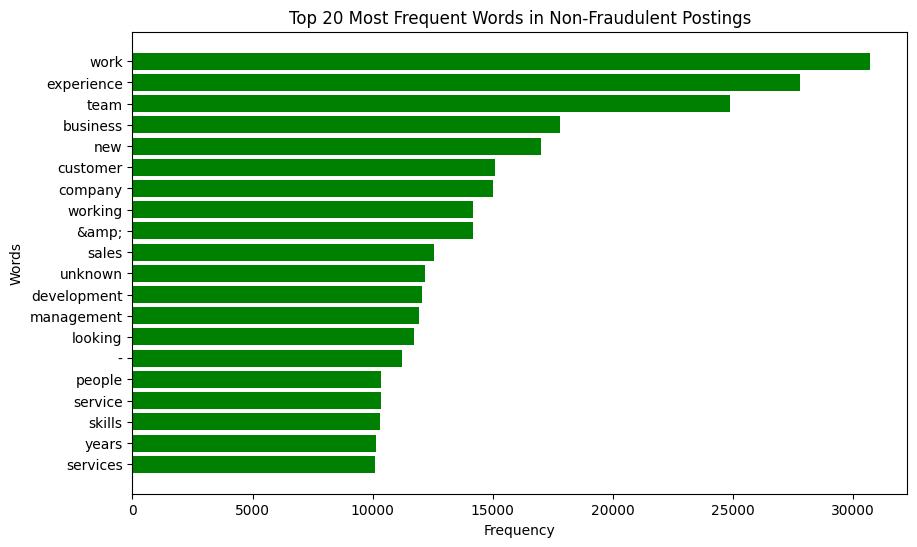

In [25]:
# Plot the bar plot for fraudulent postings
plt.figure(figsize=(10, 6))
plt.barh(fraudulent_df['Word'][:20], fraudulent_df['Frequency'][:20], color='red')
plt.title('Top 20 Most Frequent Words in Fraudulent Postings')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

# Plot the bar plot for non-fraudulent postings
plt.figure(figsize=(10, 6))
plt.barh(non_fraudulent_df['Word'][:20], non_fraudulent_df['Frequency'][:20], color='green')
plt.title('Top 20 Most Frequent Words in Non-Fraudulent Postings')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

In [26]:
# Extract just the words from the top tuples
fraudulent_words = {word for word, _ in top_fraudulent_words}
non_fraudulent_words = {word for word, _ in top_non_fraudulent_words}

# Find common words between fraudulent and non-fraudulent postings
common_words = fraudulent_words.intersection(non_fraudulent_words)

print("Common words:", common_words)


Common words: {'new', 'including', 'sales', '-', '&amp;', 'development', 'company', 'project', 'job', 'people', 'support', 'solutions', 'design', 'work', 'customer', 'looking', 'service', 'data', 'services', 'knowledge', 'high', 'business', 'product', 'skills', 'technology', 'unknown', 'team', 'help', 'working', 'ability', 'quality', 'time', 'technical', 'management', 'provide', 'experience', 'years', 'strong', 'communication'}


In [686]:
a={'new', 'including', 'sales', '-', '&amp;', 'development', 'company', 'project', 'job', 'people', 'support', 'solutions', 'design', 'work', 'customer', 'looking', 'service', 'data', 'services', 'knowledge', 'high', 'business', 'product', 'skills', 'technology', 'unknown', 'team', 'help', 'working', 'ability', 'quality', 'time', 'technical', 'management', 'provide', 'experience', 'years', 'strong', 'communication'}

In [690]:
type(a)

set

In [27]:
# Custom transformer to ensure output remains a DataFrame after SimpleImputer
class DataFrameImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fill_value='Unknown'):
        self.fill_value = fill_value
        self.imputer = SimpleImputer(strategy='constant', fill_value=fill_value)
    
    def fit(self, X, y=None):
        self.imputer.fit(X)
        return self
    
    def transform(self, X):
        X_imputed = self.imputer.transform(X)
        return pd.DataFrame(X_imputed, columns=X.columns)

In [28]:

def create_missing_indicators(df, descriptive_columns):
    for col in descriptive_columns:
        df[f'{col}_encoded'] = df[col].apply(lambda x: 1 if x != 'Unknown' else 0)
    return df
data_clean_encoded = create_missing_indicators(data_clean, descriptive_columns)

In [29]:
data_clean_encoded.head()


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,...,required_experience,required_education,industry,function,fraudulent,has_unknown,company_profile_encoded,description_encoded,requirements_encoded,benefits_encoded
0,Marketing Intern,"US, NY, New York",Marketing,Unknown,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,0,1,...,Internship,Unknown,Unknown,Marketing,0,True,1,1,1,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,...,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0,True,1,1,1,1
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,0,1,...,Unknown,Unknown,Unknown,Unknown,0,True,1,1,1,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,True,1,1,1,1
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,True,1,1,1,1


In [269]:
data_clean_encoded.shape

(17880, 23)

In [30]:
# Step 3: Function to Combine Text and Perform Collective TF-IDF Vectorization
def vectorize_descriptive_text(df, descriptive_columns, max_features=20):
    # Combine all descriptive columns into one text column
    df['combined_text'] = df[descriptive_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

    # Add the common words to the existing list of English stop words
    exclude_words = list(ENGLISH_STOP_WORDS.union(common_words))
    exclude_words.append('industry')
    # Perform TF-IDF vectorization
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words=exclude_words)
    text_vectors = vectorizer.fit_transform(df['combined_text']).toarray()
    
    # Get the feature names for the TF-IDF vectors
    feature_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame with the vectorized features
    tfidf_df = pd.DataFrame(text_vectors, columns=feature_names)
    
    # Drop the combined text column
    df = df.drop(columns=descriptive_columns + ['combined_text'])
    
    # Return the original dataframe with the vectorized features appended
    return pd.concat([df, tfidf_df], axis=1)

In [31]:
# 3. Combine Descriptive Text Columns and Perform Collective TF-IDF Vectorization
final_data = vectorize_descriptive_text(data_clean_encoded, descriptive_columns)


/Users/tusharm/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amp'] not in stop_words.
  warnings.warn(


In [32]:
common_words

{'&amp;',
 '-',
 'ability',
 'business',
 'communication',
 'company',
 'customer',
 'data',
 'design',
 'development',
 'experience',
 'help',
 'high',
 'including',
 'job',
 'knowledge',
 'looking',
 'management',
 'new',
 'people',
 'product',
 'project',
 'provide',
 'quality',
 'sales',
 'service',
 'services',
 'skills',
 'solutions',
 'strong',
 'support',
 'team',
 'technical',
 'technology',
 'time',
 'unknown',
 'work',
 'working',
 'years'}

In [33]:
final_data.head(10)

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,...,office,opportunity,position,process,products,required,role,software,web,world
0,Marketing Intern,"US, NY, New York",Marketing,Unknown,0,1,0,Other,Internship,Unknown,...,0.462204,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Unknown,0,1,0,Full-time,Not Applicable,Unknown,...,0.111742,0.104004,0.103559,0.223667,0.0,0.000000,0.561357,0.112210,0.115848,0.428064
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Unknown,Unknown,0,1,0,Unknown,Unknown,Unknown,...,0.000000,0.268441,0.000000,0.288648,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Unknown,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,...,0.000000,0.165551,0.164841,0.356025,0.0,0.156854,0.000000,0.000000,0.000000,0.681377
4,Bill Review Manager,"US, FL, Fort Worth",Unknown,Unknown,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,...,0.240516,0.000000,0.000000,0.722138,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,Accounting Clerk,"US, MD,",Unknown,Unknown,0,0,0,Unknown,Unknown,Unknown,...,0.447408,0.208213,0.414641,0.000000,0.0,0.000000,0.000000,0.224640,0.000000,0.000000
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,0,1,1,Full-time,Mid-Senior level,Master's Degree,...,0.182590,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.378596,0.699466
7,Lead Guest Service Specialist,"US, CA, San Francisco",Unknown,Unknown,0,1,1,Unknown,Unknown,Unknown,...,0.000000,0.000000,0.000000,0.261214,0.0,0.230165,0.262237,0.262093,0.000000,0.249961
8,HP BSM SME,"US, FL, Pensacola",Unknown,Unknown,0,1,1,Full-time,Associate,Unknown,...,0.000000,0.000000,0.000000,0.174121,0.0,0.153424,0.000000,0.174707,0.000000,0.000000
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",Unknown,Unknown,0,1,0,Part-time,Entry level,High School or equivalent,...,0.000000,0.000000,0.000000,0.347416,0.0,0.306121,0.000000,0.000000,0.000000,0.332450


In [34]:
final_data.columns

Index(['title', 'location', 'department', 'salary_range', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'has_unknown', 'company_profile_encoded',
       'description_encoded', 'requirements_encoded', 'benefits_encoded',
       'amp', 'based', 'best', 'client', 'clients', 'customers', 'environment',
       'great', 'growing', 'marketing', 'office', 'opportunity', 'position',
       'process', 'products', 'required', 'role', 'software', 'web', 'world'],
      dtype='object')

In [35]:
for column in data_clean.columns:
    unique_count = data_clean[column].nunique()
    dtype = data_clean[column].dtype
    print(f"Column '{column}' has data type: {dtype} and {unique_count} unique values")

Column 'title' has data type: object and 11231 unique values
Column 'location' has data type: object and 3106 unique values
Column 'department' has data type: object and 1337 unique values
Column 'salary_range' has data type: object and 875 unique values
Column 'company_profile' has data type: object and 1710 unique values
Column 'description' has data type: object and 14802 unique values
Column 'requirements' has data type: object and 11968 unique values
Column 'benefits' has data type: object and 6205 unique values
Column 'telecommuting' has data type: int64 and 2 unique values
Column 'has_company_logo' has data type: int64 and 2 unique values
Column 'has_questions' has data type: int64 and 2 unique values
Column 'employment_type' has data type: object and 6 unique values
Column 'required_experience' has data type: object and 8 unique values
Column 'required_education' has data type: object and 14 unique values
Column 'industry' has data type: object and 132 unique values
Column 'fun

In [36]:
def group_top_categories(df, column, top_n=8):
    # Get the top N most frequent categories
    top_categories = df[column].value_counts().nlargest(top_n).index
    
    # Replace all other categories with 'Other'
    df[column] = df[column].apply(lambda x: x if x in top_categories else 'Other')
    
    return df

In [37]:
# Apply the function to high-cardinality columns
high_cardinality_cols = ['title', 'location', 'department', 'industry','salary_range','function']
for col in high_cardinality_cols:
    final_data_collapsed = group_top_categories(final_data, col, top_n=8)

# Print the updated unique values for each column
for col in high_cardinality_cols:
    print(f"Column '{col}' now has {final_data_collapsed[col].nunique()} unique categories.")

# Display a few rows to see the effect
print(final_data_collapsed.head())

Column 'title' now has 9 unique categories.
Column 'location' now has 9 unique categories.
Column 'department' now has 9 unique categories.
Column 'industry' now has 9 unique categories.
Column 'salary_range' now has 9 unique categories.
Column 'function' now has 9 unique categories.
   title          location department salary_range  telecommuting  \
0  Other  US, NY, New York  Marketing      Unknown              0   
1  Other             Other      Other      Unknown              0   
2  Other             Other    Unknown      Unknown              0   
3  Other             Other      Sales      Unknown              0   
4  Other             Other    Unknown      Unknown              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0         Unknown             Unknown   
3   

In [38]:
# Function to identify low-cardinality categorical columns and apply one-hot encoding
def one_hot_encode_low_cardinality(df, max_categories=20):
    # Identify columns with fewer than max_categories unique values
    low_cardinality_cols = [col for col in df.columns if df[col].nunique() < max_categories and df[col].nunique() > 2 and df[col].dtype == 'object']
    
    # Apply one-hot encoding only to low-cardinality columns
    df_encoded = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)
    
    return df_encoded



In [39]:
final_data_encoded= one_hot_encode_low_cardinality(final_data_collapsed)

In [40]:
final_data_encoded.shape

(17880, 102)

In [41]:
for column in final_data_encoded.columns:
    unique_count = final_data_encoded[column].nunique()
    dtype = final_data_encoded[column].dtype
    print(f"Column '{column}' has data type: {dtype} and {unique_count} unique values")

Column 'telecommuting' has data type: int64 and 2 unique values
Column 'has_company_logo' has data type: int64 and 2 unique values
Column 'has_questions' has data type: int64 and 2 unique values
Column 'fraudulent' has data type: int64 and 2 unique values
Column 'has_unknown' has data type: bool and 2 unique values
Column 'company_profile_encoded' has data type: int64 and 2 unique values
Column 'description_encoded' has data type: int64 and 2 unique values
Column 'requirements_encoded' has data type: int64 and 2 unique values
Column 'benefits_encoded' has data type: int64 and 2 unique values
Column 'amp' has data type: float64 and 5028 unique values
Column 'based' has data type: float64 and 5104 unique values
Column 'best' has data type: float64 and 4202 unique values
Column 'client' has data type: float64 and 3493 unique values
Column 'clients' has data type: float64 and 4023 unique values
Column 'customers' has data type: float64 and 3641 unique values
Column 'environment' has data t

In [42]:
# Define the numerical columns to check for outliers
numerical_cols = ['amp', 'based', 'best',
       'client', 'clients', 'customers', 'environment', 'great', 'growing',
       'marketing', 'office', 'opportunity', 'position', 'process', 'products',
       'required', 'role', 'software', 'web', 'world']



In [43]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.index

# Set to store all unique outlier indices across all columns
outlier_indices = set()

# Apply IQR outlier detection for each numerical column
for col in numerical_cols:
    outliers = detect_outliers_iqr(final_data_encoded, col)
    print(f"Outliers in '{col}': {len(outliers)} rows")
    outlier_indices.update(outliers)

Outliers in 'amp': 926 rows
Outliers in 'based': 954 rows
Outliers in 'best': 1657 rows
Outliers in 'client': 4453 rows
Outliers in 'clients': 1994 rows
Outliers in 'customers': 2523 rows
Outliers in 'environment': 1095 rows
Outliers in 'great': 2502 rows
Outliers in 'growing': 1976 rows
Outliers in 'marketing': 3927 rows
Outliers in 'office': 2778 rows
Outliers in 'opportunity': 1457 rows
Outliers in 'position': 1691 rows
Outliers in 'process': 2475 rows
Outliers in 'products': 4467 rows
Outliers in 'required': 1926 rows
Outliers in 'role': 2640 rows
Outliers in 'software': 2988 rows
Outliers in 'web': 4360 rows
Outliers in 'world': 1678 rows


In [44]:
outlier_indices = list(outlier_indices)


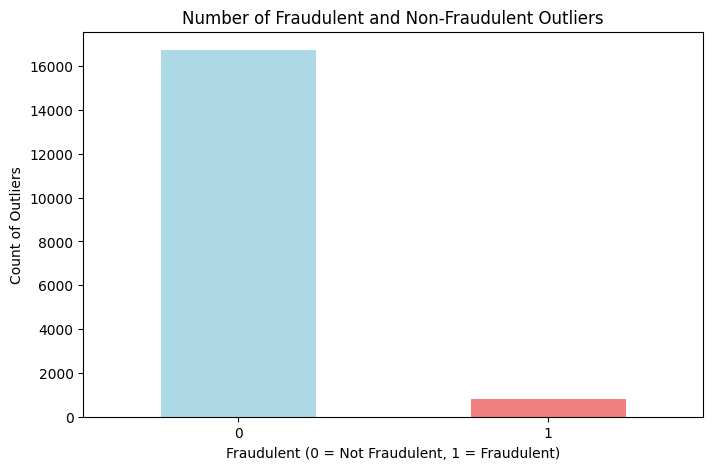

Total number of unique outliers: 17557


In [45]:

# Convert the set to a list for easier manipulation


# Subset the original dataframe to get rows where outliers exist
outliers_df = final_data_encoded.loc[outlier_indices]

# Count how many of the outliers are fraudulent
fraudulent_count = outliers_df['fraudulent'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 5))
fraudulent_count.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Number of Fraudulent and Non-Fraudulent Outliers')
plt.xlabel('Fraudulent (0 = Not Fraudulent, 1 = Fraudulent)')
plt.ylabel('Count of Outliers')
plt.xticks(rotation=0)
plt.show()

# Print the total number of unique outliers
print(f"Total number of unique outliers: {len(outlier_indices)}")

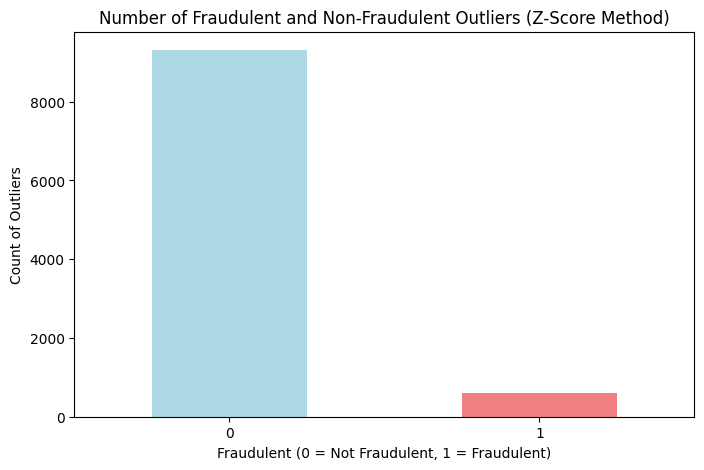

In [46]:
# Step 1: Calculate the Z-scores for each numerical column
z_scores = np.abs(stats.zscore(final_data_encoded[numerical_cols]))

# Step 2: Define a Z-score threshold (common choice is 3)
threshold = 2.9

# Step 3: Identify outlier indices where the Z-score exceeds the threshold
outlier_indices = np.where(z_scores > threshold)[0]
outlier_indices = np.unique(outlier_indices)  # Get unique row indices of outliers

# Step 4: Subset the original dataframe to get rows where outliers exist
outliers_df = final_data_encoded.loc[outlier_indices]

# Step 5: Count how many of the outliers are fraudulent
fraudulent_count = outliers_df['fraudulent'].value_counts()

# Step 6: Plot the bar graph to show number of fraudulent and non-fraudulent outliers
plt.figure(figsize=(8, 5))
fraudulent_count.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Number of Fraudulent and Non-Fraudulent Outliers (Z-Score Method)')
plt.xlabel('Fraudulent (0 = Not Fraudulent, 1 = Fraudulent)')
plt.ylabel('Count of Outliers')
plt.xticks(rotation=0)
plt.show()

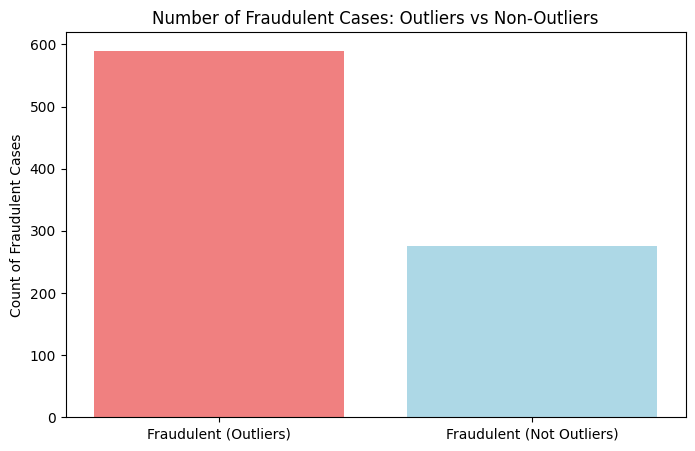

Total number of fraudulent cases: 866
Number of fraudulent cases that are outliers: 590
Number of fraudulent cases that are not outliers: 276


In [47]:
# Step 1: Total number of fraudulent cases
total_fraudulent = final_data_encoded[final_data_encoded['fraudulent'] == 1].shape[0]

# Step 2: Number of fraudulent cases that are outliers
fraudulent_outliers = outliers_df[outliers_df['fraudulent'] == 1].shape[0]

# Step 3: Number of fraudulent cases that are not outliers
fraudulent_not_outliers = total_fraudulent - fraudulent_outliers

# Step 4: Create a bar plot for fraudulent cases
plt.figure(figsize=(8, 5))
plt.bar(['Fraudulent (Outliers)', 'Fraudulent (Not Outliers)'], 
        [fraudulent_outliers, fraudulent_not_outliers], 
        color=['lightcoral', 'lightblue'])

plt.title('Number of Fraudulent Cases: Outliers vs Non-Outliers')
plt.ylabel('Count of Fraudulent Cases')
plt.show()

# Display the numbers
print(f"Total number of fraudulent cases: {total_fraudulent}")
print(f"Number of fraudulent cases that are outliers: {fraudulent_outliers}")
print(f"Number of fraudulent cases that are not outliers: {fraudulent_not_outliers}")

In [48]:
# Function to detect outliers using log-transformed IQR
def detect_outliers_iqr_log(df, column):
    # Apply log transformation temporarily (log1p handles 0 values by computing log(1 + x))
    log_transformed = np.log1p(df[column])
    
    # Compute Q1, Q3, and IQR on the log-transformed data
    Q1 = log_transformed.quantile(0.25)
    Q3 = log_transformed.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers based on the original data
    outliers = df[(log_transformed < lower_bound) | (log_transformed > upper_bound)]
    return outliers.index

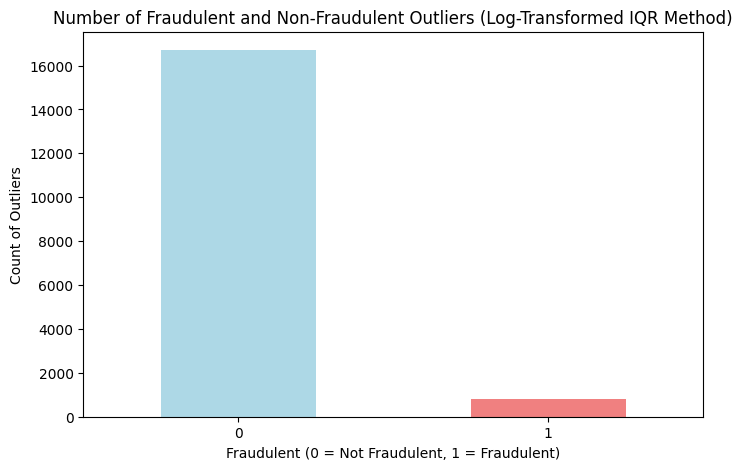

Total number of unique outliers: 17528


In [49]:
# Set to store all unique outlier indices across all columns
outlier_indices = set()

# Detect outliers in each numerical column using log transformation in the IQR method
for col in numerical_cols:
    outliers = detect_outliers_iqr_log(final_data_encoded, col)
    outlier_indices.update(outliers)

# Convert the set to a list for easier manipulation
outlier_indices = list(outlier_indices)

# Subset the original dataframe to get rows where outliers exist
outliers_df = final_data_encoded.loc[outlier_indices]

# Count how many of the outliers are fraudulent
fraudulent_count = outliers_df['fraudulent'].value_counts()

# Plot the bar graph to show number of fraudulent and non-fraudulent outliers
plt.figure(figsize=(8, 5))
fraudulent_count.plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title('Number of Fraudulent and Non-Fraudulent Outliers (Log-Transformed IQR Method)')
plt.xlabel('Fraudulent (0 = Not Fraudulent, 1 = Fraudulent)')
plt.ylabel('Count of Outliers')
plt.xticks(rotation=0)
plt.show()

# Print the total number of unique outliers
print(f"Total number of unique outliers: {len(outlier_indices)}")

In [50]:
# Select only numerical columns
numerical_columns = final_data_encoded.select_dtypes(include=['int64', 'float64']).columns

# Ensure 'fraudulent' (the target) is included in the correlation matrix
numerical_columns_with_target = numerical_columns.union(['fraudulent'])

# Create correlation matrix with only numerical columns and the target
correlation_matrix = final_data_encoded[numerical_columns_with_target].corr()

# Get the correlation of each numerical feature with the target
correlation_with_target = correlation_matrix['fraudulent'].abs()

# Set a threshold for correlation
correlation_threshold = 0.05

# Select features that are highly correlated with the target
selected_columns = correlation_with_target[correlation_with_target > correlation_threshold].index

print(f"Selected features (Correlation with Target): {list(selected_columns)}")

Selected features (Correlation with Target): ['based', 'best', 'company_profile_encoded', 'fraudulent', 'growing', 'has_company_logo', 'has_questions', 'marketing', 'position', 'role', 'software', 'web', 'world']


In [530]:
from sklearn.model_selection import train_test_split

# Assuming 'final_data_encoded' is your preprocessed dataset
# The target column is 'fraudulent'

# Separate features (X) and target (y)
X = final_data_encoded.drop(columns='fraudulent')  # Features (independent variables)
y = final_data_encoded['fraudulent']  # Target (dependent variable)

# Split the data into training and testing sets (you can adjust test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and y_train are your training data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")


X_train shape: (14304, 101)
y_train shape: (14304,)


In [532]:
X_train.columns

Index(['telecommuting', 'has_company_logo', 'has_questions', 'has_unknown',
       'company_profile_encoded', 'description_encoded',
       'requirements_encoded', 'benefits_encoded', 'amp', 'based',
       ...
       'industry_Other', 'industry_Unknown', 'function_Customer Service',
       'function_Design', 'function_Engineering',
       'function_Information Technology', 'function_Marketing',
       'function_Other', 'function_Sales', 'function_Unknown'],
      dtype='object', length=101)

In [568]:
from sklearn.ensemble import RandomForestClassifier

# Fit a RandomForestClassifier to the textual features (TF-IDF vectors)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_integers, y_train)  # Assuming X_text is the matrix of TF-IDF vectors

# Get feature importances
importances = model.feature_importances_



In [570]:
X_train_integers.shape
#y_train.shape

(14304, 100)

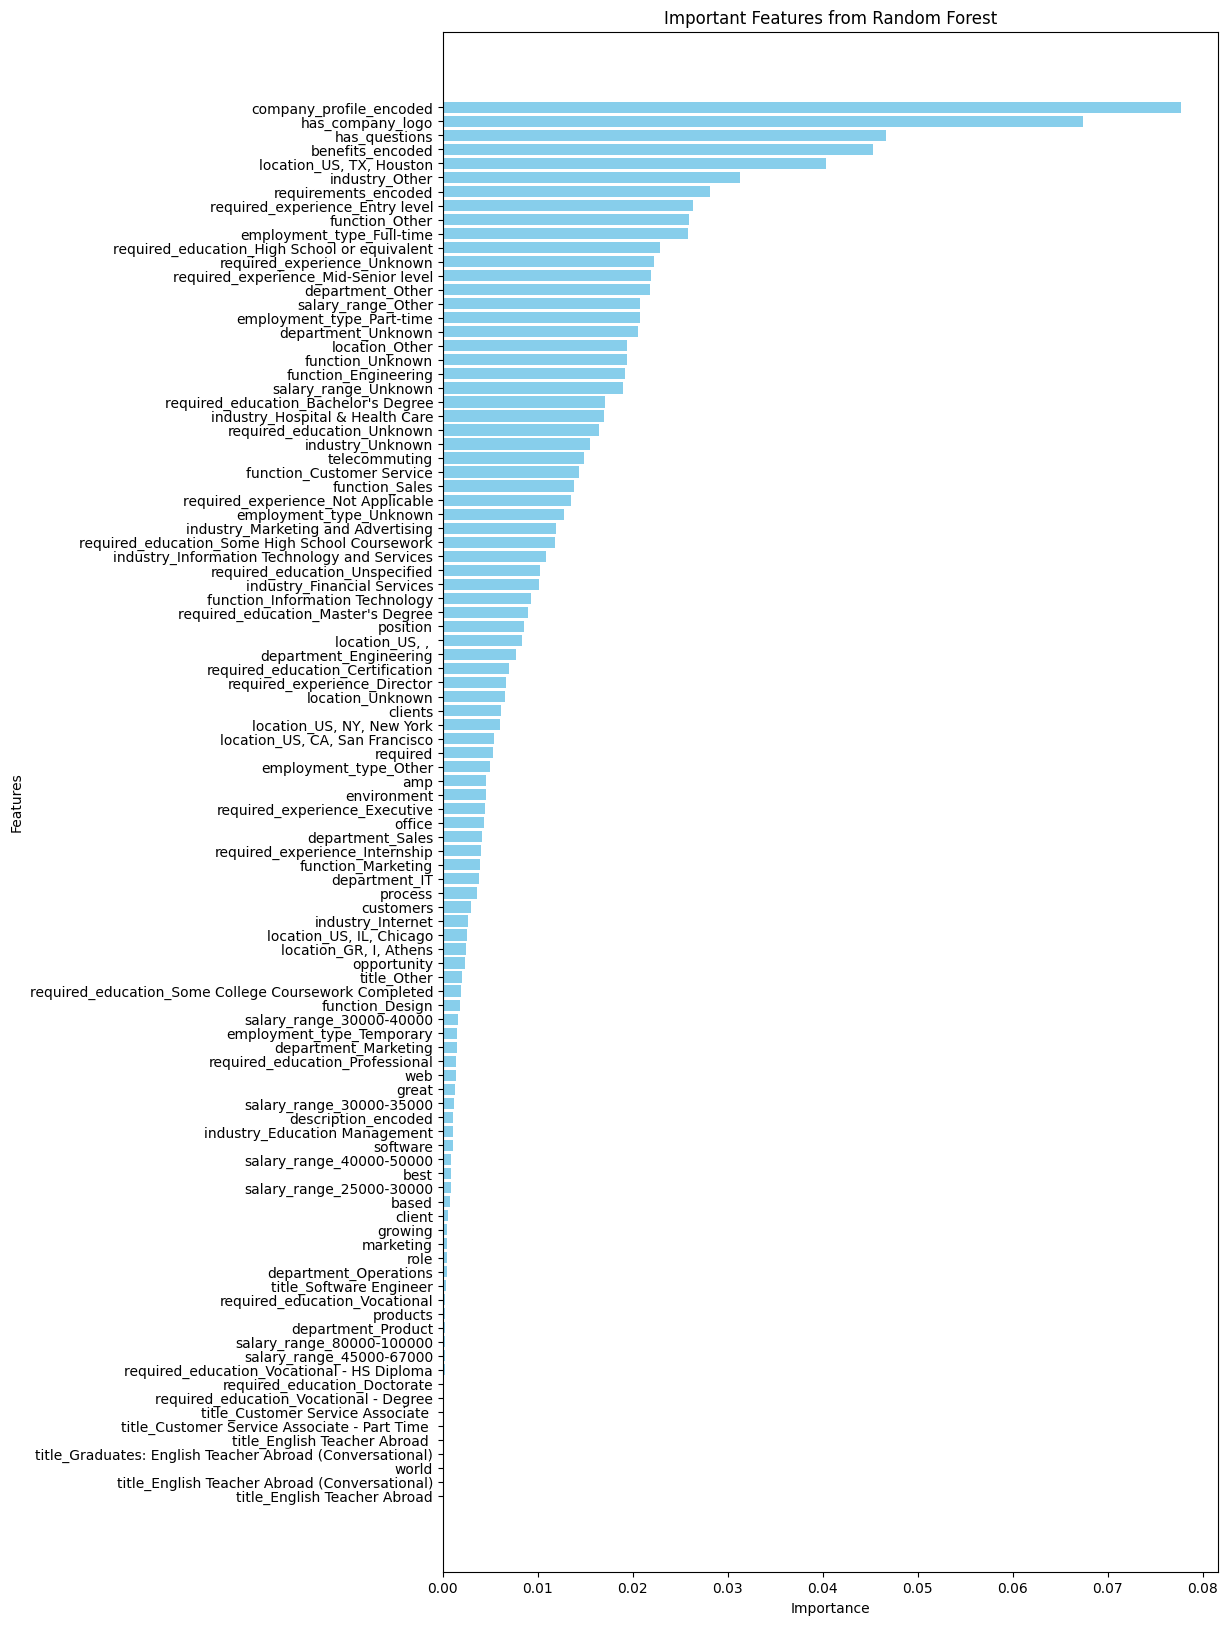

In [574]:
# Create a DataFrame to store feature names and their importances
feature_importance_rf = pd.DataFrame({
    'Feature': X_train_integers.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features using a bar plot
plt.figure(figsize=(10, 20))
plt.barh(feature_importance_rf['Feature'][:100], feature_importance_rf['Importance'][:100], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Important Features from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

Top 10 important features using Decision Trees:
                                 Feature  Importance
3                company_profile_encoded    0.104601
2                          has_questions    0.058012
6                       benefits_encoded    0.052985
41              location_US, TX, Houston    0.051332
71  required_education_Bachelor's Degree    0.032699
65       required_experience_Entry level    0.032321
90                        industry_Other    0.031323
1                       has_company_logo    0.030448
57                    salary_range_Other    0.030045
5                   requirements_encoded    0.027403


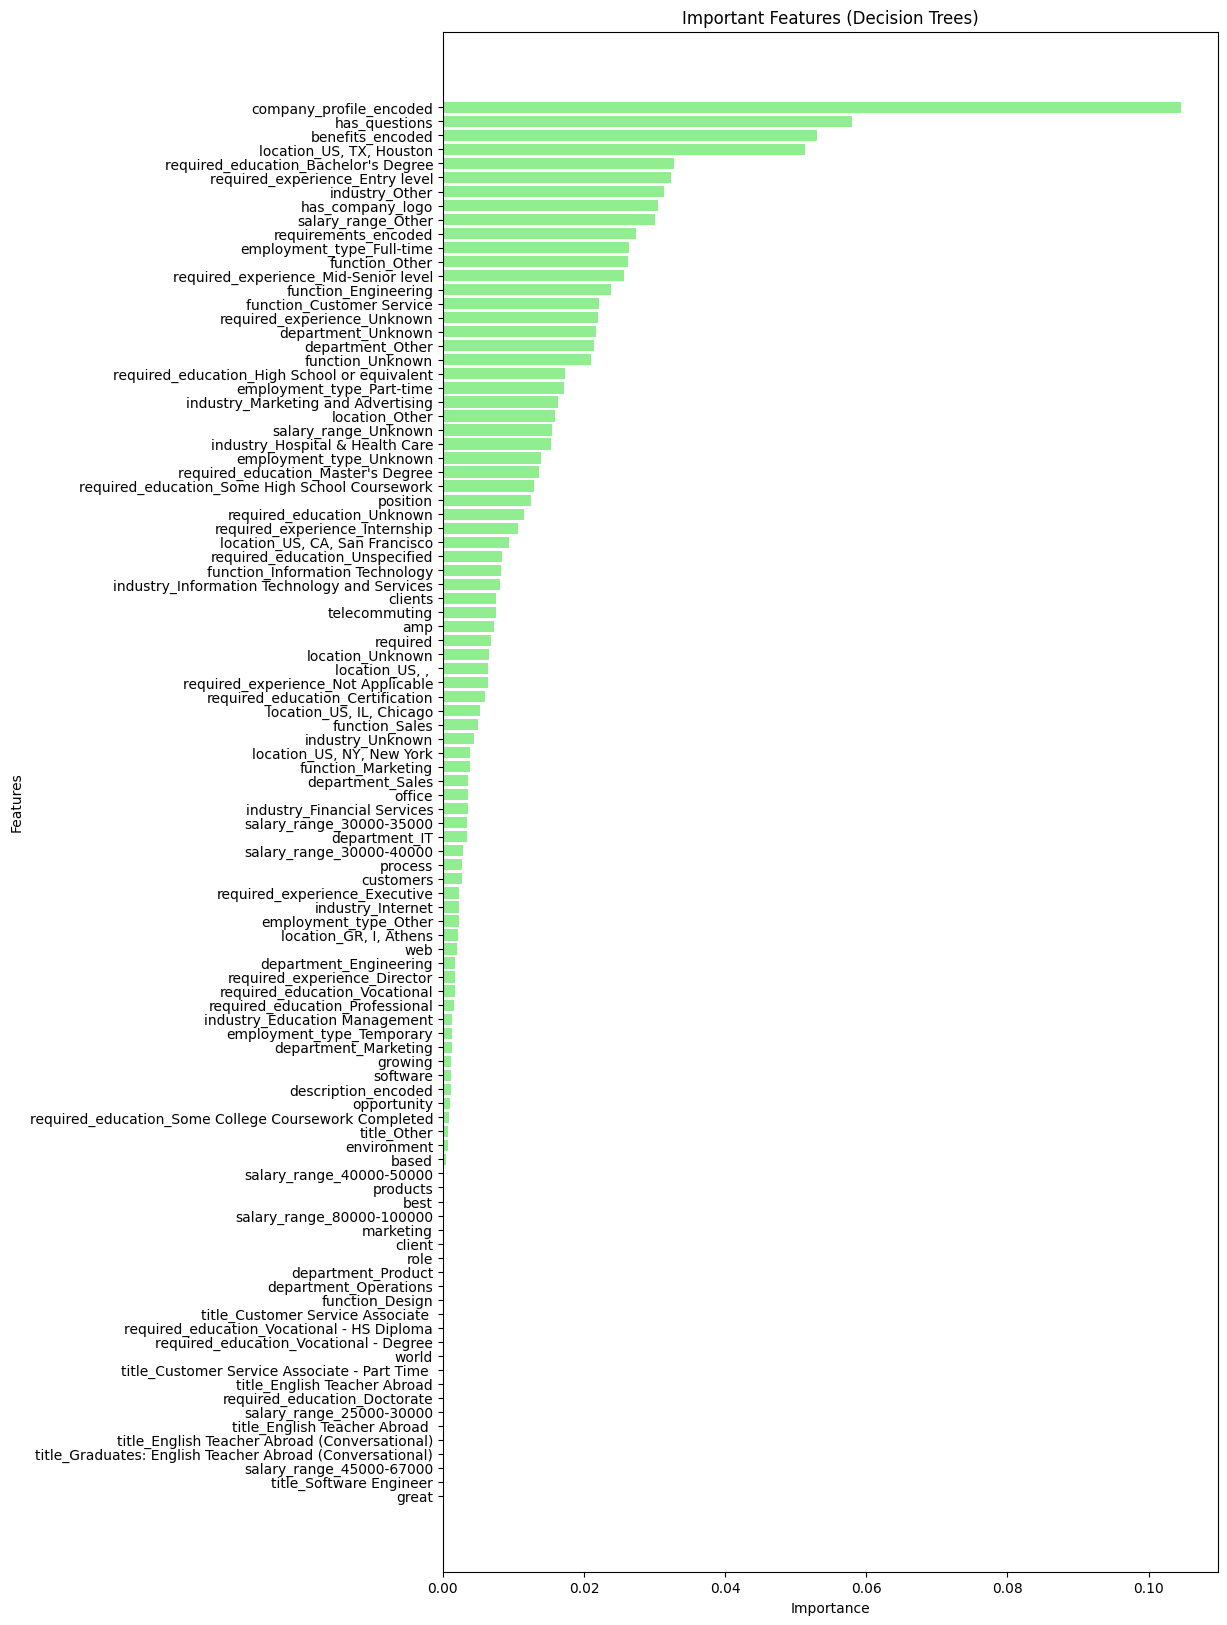

In [580]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

# Fit a DecisionTreeClassifier to the features (X) and target (y)
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_integers, y_train)

# Get feature importances
importances = decision_tree.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_dt = pd.DataFrame({
    'Feature': X_train_integers.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

# Print the top 10 important features
print("Top 10 important features using Decision Trees:")
print(feature_importance_dt.head(10))

# Plot the top 10 most important features using a bar plot
plt.figure(figsize=(10, 20))
plt.barh(feature_importance_dt['Feature'][:100], feature_importance_dt['Importance'][:100], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Important Features (Decision Trees)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()



In [56]:
y.unique()

array([0, 1])

Top 10 important features using XGBoost:
                                           Feature  Importance
3                          company_profile_encoded    0.143481
78  required_education_Some High School Coursework    0.051950
41                        location_US, TX, Houston    0.049210
94                            function_Engineering    0.031195
71            required_education_Bachelor's Degree    0.030743
68            required_experience_Mid-Senior level    0.028913
86                 industry_Hospital & Health Care    0.026190
1                                 has_company_logo    0.025822
88                               industry_Internet    0.022653
2                                    has_questions    0.019980
Top 10 important features using XGBoost:
                                           Feature  Importance
3                          company_profile_encoded    0.143481
78  required_education_Some High School Coursework    0.051950
41                        location_U

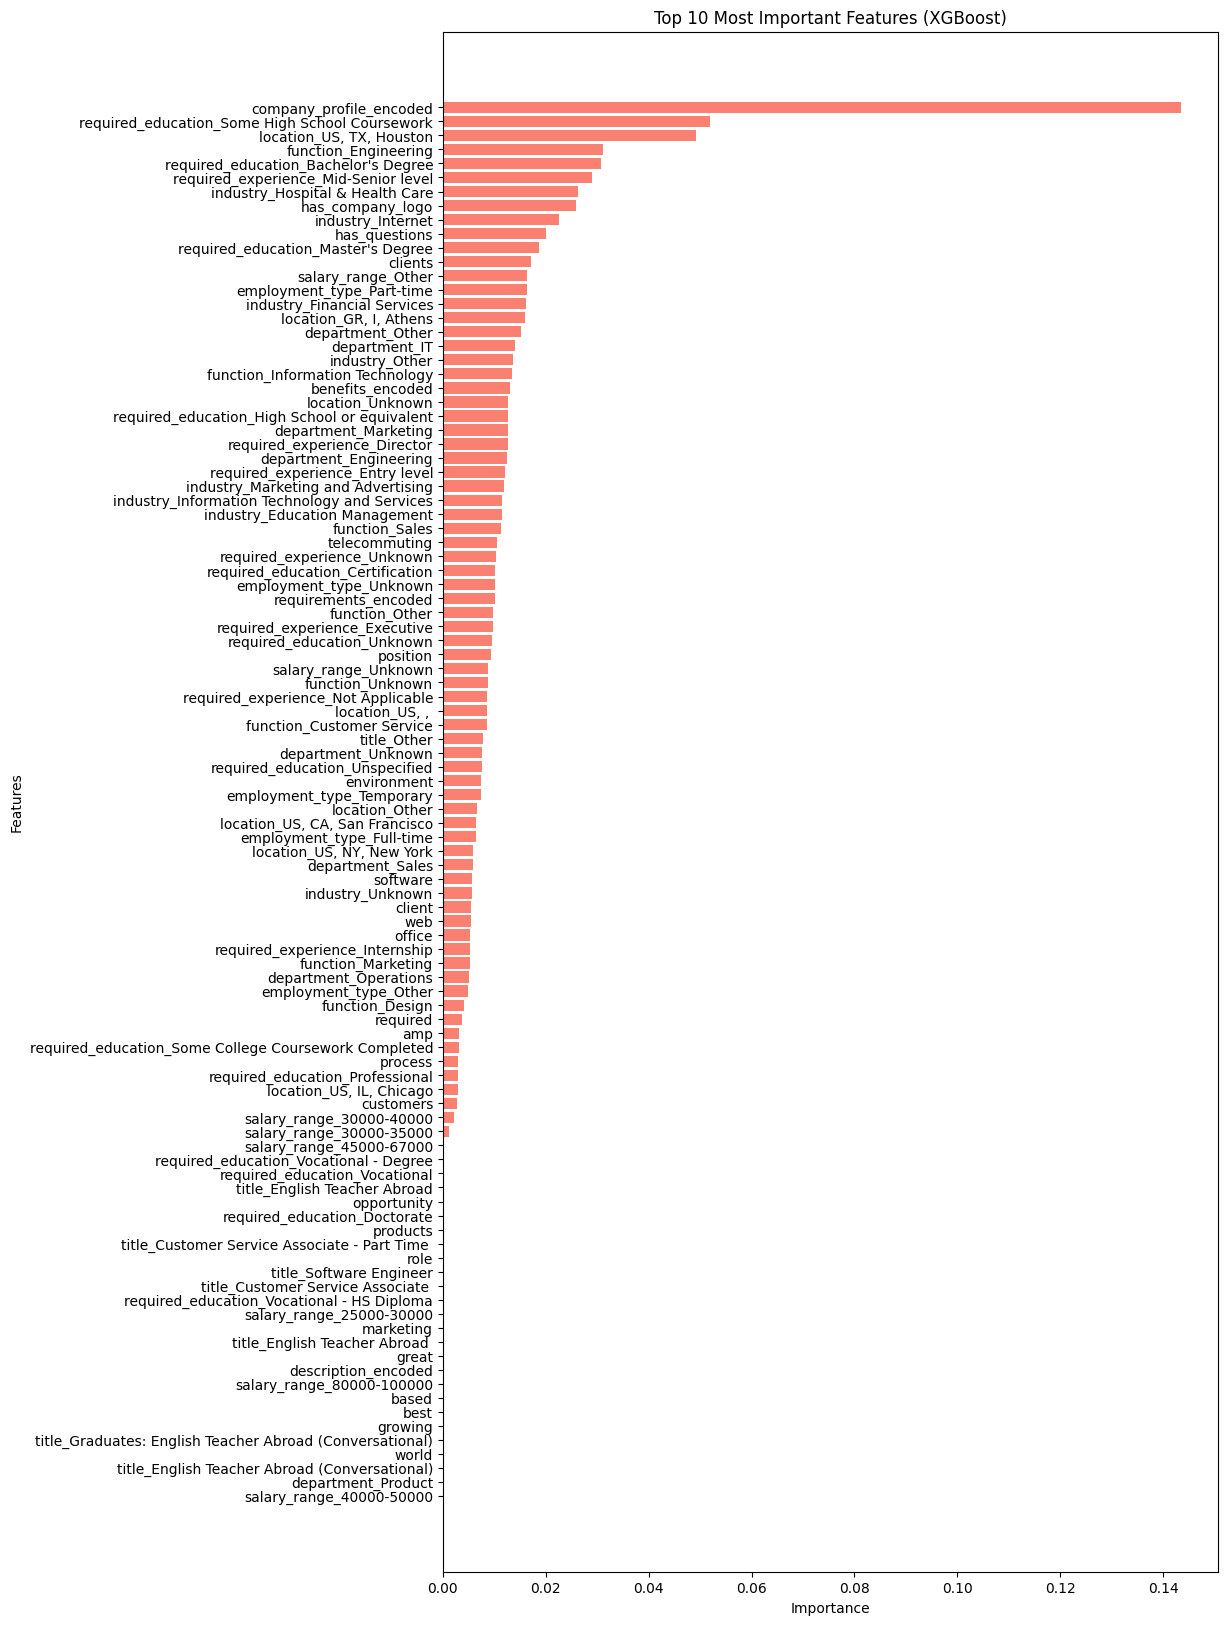

In [582]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Fit an XGBoost model (Assuming X and y are already prepared)
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X_train_integers, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_xg = pd.DataFrame({
    'Feature': X_train_integers.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_xg = feature_importance_xg.sort_values(by='Importance', ascending=False)

# Print the top 10 important features
print("Top 10 important features using XGBoost:")
print(feature_importance_xg.head(10))

# Plot the top
# Sort the DataFrame by importance
feature_importance_xg = feature_importance_xg.sort_values(by='Importance', ascending=False)

# Print the top 10 important features
print("Top 10 important features using XGBoost:")
print(feature_importance_xg.head(10))

# Plot the top 10 most important features using a bar plot
plt.figure(figsize=(10, 20))
plt.barh(feature_importance_xg['Feature'][:100], feature_importance_xg['Importance'][:100], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Most Important Features (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

In [584]:
# Step 1: Rename the 'Importance' column in feature_importance_xg
feature_importance_xg = feature_importance_xg.rename(columns={'Importance': 'Importance_xg'})

# Step 1: Merge the three feature importance DataFrames on the 'Feature' column
merged_feature_importance = pd.merge(
    pd.merge(feature_importance_dt, feature_importance_rf, on='Feature', suffixes=('_dt', '_rf')), 
    feature_importance_xg, on='Feature', suffixes=('', '_xg')
)

merged_feature_importance['Total_Importance'] = merged_feature_importance['Importance_dt'] + merged_feature_importance['Importance_rf'] + merged_feature_importance['Importance_xg']

# Define the threshold based on the 25th percentile
importance_threshold = 0.0020

# Filter out features where the importance is below the threshold in all three models
selected_features = merged_feature_importance[
    (merged_feature_importance['Importance_dt'] > importance_threshold) &
    (merged_feature_importance['Importance_rf'] > importance_threshold) &
    (merged_feature_importance['Importance_xg'] > importance_threshold)
]

print(f"Remaining features after applying the threshold: {selected_features['Feature'].tolist()}")


Remaining features after applying the threshold: ['company_profile_encoded', 'has_questions', 'benefits_encoded', 'location_US, TX, Houston', "required_education_Bachelor's Degree", 'required_experience_Entry level', 'industry_Other', 'has_company_logo', 'salary_range_Other', 'requirements_encoded', 'employment_type_Full-time', 'function_Other', 'required_experience_Mid-Senior level', 'function_Engineering', 'function_Customer Service', 'required_experience_Unknown', 'department_Unknown', 'department_Other', 'function_Unknown', 'required_education_High School or equivalent', 'employment_type_Part-time', 'industry_Marketing and Advertising', 'location_Other', 'salary_range_Unknown', 'industry_Hospital & Health Care', 'employment_type_Unknown', "required_education_Master's Degree", 'required_education_Some High School Coursework', 'position', 'required_education_Unknown', 'required_experience_Internship', 'location_US, CA, San Francisco', 'required_education_Unspecified', 'function_Infor

In [586]:
# Ensure that the column names in all dataframes are correct
print(feature_importance_dt.columns)
print(feature_importance_rf.columns)
print(feature_importance_xg.columns)
print(merged_feature_importance.columns)

Index(['Feature', 'Importance'], dtype='object')
Index(['Feature', 'Importance'], dtype='object')
Index(['Feature', 'Importance_xg'], dtype='object')
Index(['Feature', 'Importance_dt', 'Importance_rf', 'Importance_xg',
       'Total_Importance'],
      dtype='object')


In [588]:
subset_features=selected_features['Feature'].tolist()

In [678]:
subset_features

['company_profile_encoded',
 'has_questions',
 'benefits_encoded',
 'location_US, TX, Houston',
 "required_education_Bachelor's Degree",
 'required_experience_Entry level',
 'industry_Other',
 'has_company_logo',
 'salary_range_Other',
 'requirements_encoded',
 'employment_type_Full-time',
 'function_Other',
 'required_experience_Mid-Senior level',
 'function_Engineering',
 'function_Customer Service',
 'required_experience_Unknown',
 'department_Unknown',
 'department_Other',
 'function_Unknown',
 'required_education_High School or equivalent',
 'employment_type_Part-time',
 'industry_Marketing and Advertising',
 'location_Other',
 'salary_range_Unknown',
 'industry_Hospital & Health Care',
 'employment_type_Unknown',
 "required_education_Master's Degree",
 'required_education_Some High School Coursework',
 'position',
 'required_education_Unknown',
 'required_experience_Internship',
 'location_US, CA, San Francisco',
 'required_education_Unspecified',
 'function_Information Technolog

In [62]:
merged_feature_importance.describe()

,Importance_dt,Importance_rf,Importance_xg,Total_Importance
count,101.000000,101.000000,101.000000,101.000000
mean,0.009901,0.009901,0.009901,0.029703
std,0.014611,0.011882,0.017370,0.037460
min,0.000000,0.000000,0.000000,0.000000
25%,0.000336,0.000872,0.001898,0.003581
50%,0.003861,0.005387,0.006192,0.019538
75%,0.012256,0.013324,0.009561,0.043768
max,0.082226,0.050888,0.145619,0.278733


In [716]:
final_data_encoded

,telecommuting,has_company_logo,has_questions,fraudulent,has_unknown,company_profile_encoded,description_encoded,requirements_encoded,benefits_encoded,amp,...,industry_Other,industry_Unknown,function_Customer Service,function_Design,function_Engineering,function_Information Technology,function_Marketing,function_Other,function_Sales,function_Unknown
0,0,1,0,0,True,1,1,1,0,0.372354,...,False,True,False,False,False,False,True,False,False,False
1,0,1,0,0,True,1,1,1,1,0.180041,...,False,False,True,False,False,False,False,False,False,False
2,0,1,0,0,True,1,1,1,0,0.232347,...,False,True,False,False,False,False,False,False,False,True
3,0,1,0,0,True,1,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False
4,0,1,1,0,True,1,1,1,1,0.193762,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,True,1,1,1,1,0.258181,...,False,False,False,False,False,False,False,False,True,False
17876,0,1,1,0,True,1,1,1,1,0.374642,...,False,False,False,False,False,False,False,True,False,False
17877,0,0,0,0,True,1,1,1,0,0.000000,...,False,True,False,False,False,False,False,False,False,True
17878,0,0,1,0,True,0,1,1,1,0.538167,...,True,False,False,True,False,False,False,False,False,False


In [718]:
# Create the final dataset by selecting only the features from final_data_encoded
X = final_data_encoded[subset_features]

# Assuming 'fraudulent' is your target variable
y = final_data_encoded['fraudulent'].astype(int)

In [720]:
# Convert all boolean columns in the features (X) to integers
X = X.astype(int)

# Convert the target variable (y) to integers as well
y = y.astype(int)

# Check the dtypes to confirm conversion
print(X.dtypes)  # Should now show int for all columns
print(type(y))   # Should show int type for the target variable


company_profile_encoded                           int64
has_questions                                     int64
benefits_encoded                                  int64
location_US, TX, Houston                          int64
required_education_Bachelor's Degree              int64
required_experience_Entry level                   int64
industry_Other                                    int64
has_company_logo                                  int64
salary_range_Other                                int64
requirements_encoded                              int64
employment_type_Full-time                         int64
function_Other                                    int64
required_experience_Mid-Senior level              int64
function_Engineering                              int64
function_Customer Service                         int64
required_experience_Unknown                       int64
department_Unknown                                int64
department_Other                                

In [722]:


# Split the data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Now, X_train and y_train are your training data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"Training class distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing class distribution:\n{y_test.value_counts(normalize=True)}")



X_train shape: (14304, 58)
y_train shape: (14304,)
Training class distribution:
fraudulent
0    0.951552
1    0.048448
Name: proportion, dtype: float64
Testing class distribution:
fraudulent
0    0.951622
1    0.048378
Name: proportion, dtype: float64


In [724]:
# Check class distribution before applying SMOTE
print("Class distribution before SMOTE:")
print(Counter(y_train))

# Apply SMOTE to generate synthetic samples for the minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after applying SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(y_train_smote))

Class distribution before SMOTE:
Counter({0: 13611, 1: 693})

Class distribution after SMOTE:
Counter({0: 13611, 1: 13611})


In [727]:
X.head()

,company_profile_encoded,has_questions,benefits_encoded,"location_US, TX, Houston",required_education_Bachelor's Degree,required_experience_Entry level,industry_Other,has_company_logo,salary_range_Other,requirements_encoded,...,department_Sales,office,industry_Financial Services,department_IT,process,customers,required_experience_Executive,industry_Internet,employment_type_Other,"location_GR, I, Athens"
0,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
4,1,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [729]:


# Scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

### Step 3: Logistic Regression - Hyperparameter Tuning
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100,1000],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'],  # Regularization type
    
}


In [731]:
# Define Stratified K-Fold Cross-Validation
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [733]:
stratified_kfold

StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [735]:
# Define file path for saving/loading results
results_file = "logistic_grid_results.pkl"

# Check if the results file exists
if os.path.exists(results_file):
    print("Loading saved results from file...")
    with open(results_file, "rb") as file:
        logistic_grid = pickle.load(file)
else:
    print("Results file not found. Running GridSearchCV...")
    
    # Define the Logistic Regression model
    logistic_reg = LogisticRegression(random_state=42, max_iter=100000)

    

    # Define the Grid Search for Logistic Regression
    logistic_grid = GridSearchCV(
        estimator=logistic_reg,
        param_grid=logistic_params,  # Replace with your parameter grid
        scoring=scoring,            # Replace with your scoring metric(s)
        refit='roc_auc',            # Metric to refit the model
        cv=stratified_kfold,
        n_jobs=-1                   # Use all available processors
    )
    
    # Run the Grid Search
    logistic_grid.fit(X_train_smote, y_train_smote)
    
    # Save results to a .pkl file
    with open(results_file, "wb") as file:
        pickle.dump(logistic_grid, file)
    print(f"Results saved to {results_file}")

# Get the best Logistic Regression model
best_logistic_model = logistic_grid.best_estimator_
print("Best Logistic Regression model:", best_logistic_model)

Loading saved results from file...
Best Logistic Regression model: LogisticRegression(C=10, max_iter=100000, random_state=42, solver='liblinear')


In [737]:
X_test.columns

Index(['company_profile_encoded', 'has_questions', 'benefits_encoded',
       'location_US, TX, Houston', 'required_education_Bachelor's Degree',
       'required_experience_Entry level', 'industry_Other', 'has_company_logo',
       'salary_range_Other', 'requirements_encoded',
       'employment_type_Full-time', 'function_Other',
       'required_experience_Mid-Senior level', 'function_Engineering',
       'function_Customer Service', 'required_experience_Unknown',
       'department_Unknown', 'department_Other', 'function_Unknown',
       'required_education_High School or equivalent',
       'employment_type_Part-time', 'industry_Marketing and Advertising',
       'location_Other', 'salary_range_Unknown',
       'industry_Hospital & Health Care', 'employment_type_Unknown',
       'required_education_Master's Degree',
       'required_education_Some High School Coursework', 'position',
       'required_education_Unknown', 'required_experience_Internship',
       'location_US, CA, San

In [739]:
X_train_smote.columns

Index(['company_profile_encoded', 'has_questions', 'benefits_encoded',
       'location_US, TX, Houston', 'required_education_Bachelor's Degree',
       'required_experience_Entry level', 'industry_Other', 'has_company_logo',
       'salary_range_Other', 'requirements_encoded',
       'employment_type_Full-time', 'function_Other',
       'required_experience_Mid-Senior level', 'function_Engineering',
       'function_Customer Service', 'required_experience_Unknown',
       'department_Unknown', 'department_Other', 'function_Unknown',
       'required_education_High School or equivalent',
       'employment_type_Part-time', 'industry_Marketing and Advertising',
       'location_Other', 'salary_range_Unknown',
       'industry_Hospital & Health Care', 'employment_type_Unknown',
       'required_education_Master's Degree',
       'required_education_Some High School Coursework', 'position',
       'required_education_Unknown', 'required_experience_Internship',
       'location_US, CA, San

In [741]:
print(X_train_smote.dtypes)
print(X_test.dtypes)

# Align data types if necessary
X_test = X_test.astype(X_train_smote.dtypes)


company_profile_encoded                           int64
has_questions                                     int64
benefits_encoded                                  int64
location_US, TX, Houston                          int64
required_education_Bachelor's Degree              int64
required_experience_Entry level                   int64
industry_Other                                    int64
has_company_logo                                  int64
salary_range_Other                                int64
requirements_encoded                              int64
employment_type_Full-time                         int64
function_Other                                    int64
required_experience_Mid-Senior level              int64
function_Engineering                              int64
function_Customer Service                         int64
required_experience_Unknown                       int64
department_Unknown                                int64
department_Other                                

In [743]:
#best_logistic_model.score(X_test, y_test)

In [745]:
X_train_smote.shape
X_test.shape

(3576, 58)

In [747]:
# Check feature names at fit time and current test set
print("Fit-time feature names:", repr(best_logistic_model.feature_names_in_))
print("Test set feature names:", repr(X_test.columns.tolist()))


Fit-time feature names: array(['company_profile_encoded', 'opportunity', 'office', 'products',
       'position', 'amp', 'location_US, TX, Houston', 'environment',
       'required', 'client', 'great',
       'required_education_High School or equivalent',
       'industry_Hospital & Health Care', 'has_company_logo', 'web',
       'based', 'customers', "required_education_Bachelor's Degree",
       'best', 'clients', 'process', 'has_questions', 'role',
       'required_education_Some High School Coursework', 'world',
       'growing', 'marketing', 'software', 'benefits_encoded',
       'function_Customer Service', 'telecommuting',
       'employment_type_Part-time', 'industry_Other',
       'required_experience_Entry level', 'department_Other',
       'required_education_Unknown', 'required_experience_Director',
       'function_Unknown', 'function_Other',
       'industry_Marketing and Advertising',
       'industry_Information Technology and Services',
       'required_experience_Unk

In [749]:
final_data_encoded

,telecommuting,has_company_logo,has_questions,fraudulent,has_unknown,company_profile_encoded,description_encoded,requirements_encoded,benefits_encoded,amp,...,industry_Other,industry_Unknown,function_Customer Service,function_Design,function_Engineering,function_Information Technology,function_Marketing,function_Other,function_Sales,function_Unknown
0,0,1,0,0,True,1,1,1,0,0.372354,...,False,True,False,False,False,False,True,False,False,False
1,0,1,0,0,True,1,1,1,1,0.180041,...,False,False,True,False,False,False,False,False,False,False
2,0,1,0,0,True,1,1,1,0,0.232347,...,False,True,False,False,False,False,False,False,False,True
3,0,1,0,0,True,1,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False
4,0,1,1,0,True,1,1,1,1,0.193762,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,True,1,1,1,1,0.258181,...,False,False,False,False,False,False,False,False,True,False
17876,0,1,1,0,True,1,1,1,1,0.374642,...,False,False,False,False,False,False,False,True,False,False
17877,0,0,0,0,True,1,1,1,0,0.000000,...,False,True,False,False,False,False,False,False,False,True
17878,0,0,1,0,True,0,1,1,1,0.538167,...,True,False,False,True,False,False,False,False,False,False


In [751]:
    # Define Decision Tree and hyperparameters
decision_tree_params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [10, 20, 40],
    'criterion': ['gini', 'entropy']
    }

In [753]:
# Define file path for saving/loading results
decision_tree_results_file = "decision_tree_grid_results.pkl"

# Check if the results file exists
if os.path.exists(decision_tree_results_file):
    print("Loading saved results from file...")
    with open(decision_tree_results_file, "rb") as file:
        decision_tree_grid = pickle.load(file)
else:
    print("Results file not found. Running GridSearchCV...")

    
    decision_tree = DecisionTreeClassifier(random_state=42)

    # Grid Search with 5-Fold Cross-Validation for Decision Tree
    decision_tree_grid = GridSearchCV(
        estimator=decision_tree,
        param_grid=decision_tree_params,
        scoring=scoring,  
        refit='roc_auc', 
        cv=10,
        n_jobs=-1
    )
    
    # Fit the grid search
    decision_tree_grid.fit(X_train_smote, y_train_smote)
    
    # Save results to a .pkl file
    with open(decision_tree_results_file, "wb") as file:
        pickle.dump(decision_tree_grid, file)
    print(f"Results saved to {decision_tree_results_file}")

# Get the best Decision Tree model
best_tree_model = decision_tree_grid.best_estimator_
print("Best Decision Tree model:", best_tree_model)

Loading saved results from file...
Best Decision Tree model: DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=42)


In [755]:
 decision_tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [757]:
from sklearn.metrics import roc_auc_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # For AUC score
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Specificity (True Negative Rate)
    specificity = tn / (tn + fp)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"AUC: {auc:.4f}")
    
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'specificity': specificity, 'auc': auc}

# Evaluate the best logistic regression model
print("Logistic Regression Performance:")
logistic_results = evaluate_model(best_logistic_model, X_test, y_test)

# Evaluate the best decision tree model
print("\nDecision Tree Performance:")
tree_results = evaluate_model(best_tree_model, X_test, y_test)

Logistic Regression Performance:


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- department_IT
- department_Sales
- employment_type_Other
- function_Marketing
- industry_Financial Services
- ...
Feature names seen at fit time, yet now missing:
- based
- best
- client
- environment
- great
- ...


In [759]:
# XGBoost Hyperparameter Grid
xgboost_params = {
    'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [30, 50, 70],
    'subsample': [0.8, 1.0],
    
}

# Random Forest Hyperparameter Grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# SVM Hyperparameter Grid
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}


In [765]:

# Define file path for saving/loading results
svm_results_file = "svm_grid_results.pkl"

# Check if the results file exists
if os.path.exists(svm_results_file):
    print("Loading saved results from file...")
    with open(svm_results_file, "rb") as file:
        svm_grid = pickle.load(file)
else:
    print("Results file not found. Running GridSearchCV...")

    # Define SVM model
    svm_model = SVC(probability=True, random_state=42)

  

    # Define GridSearchCV for SVM
    svm_grid = GridSearchCV(
        estimator=svm_model,
        param_grid=svm_params,
        scoring=scoring,
        refit='roc_auc',
        cv=stratified_kfold,                                
        n_jobs=-1                            
    )

    # Fit the grid search
    svm_grid.fit(X_train_smote, y_train_smote)

    # Save results to a .pkl file
    with open(svm_results_file, "wb") as file:
        pickle.dump(svm_grid, file)
    print(f"Results saved to {svm_results_file}")

# Get the best SVM model
svm_best = svm_grid.best_estimator_

# Predict on the test set
y_pred_svm = svm_best.predict(X_test)
y_proba_svm = svm_best.predict_proba(X_test)[:, 1]

svm_results = evaluate_model(svm_best, X_test, y_test)


Results file not found. Running GridSearchCV...
Results saved to svm_grid_results.pkl
Accuracy: 0.8378
Precision: 0.1903
Recall: 0.7225
F1 Score: 0.3012
Specificity: 0.8437
AUC: 0.8653


In [114]:
# Check for columns with data type 'object'
object_columns = X.select_dtypes(include=['object']).columns

# Print out the columns that are of 'object' type
print("Object type columns:")
print(object_columns)

Object type columns:
Index([], dtype='object')


In [118]:

# Define file path for saving/loading results
xgboost_results_file = "xgboost_grid_results.pkl"

# Check if the results file exists
if os.path.exists(xgboost_results_file):
    print("Loading saved results from file...")
    with open(xgboost_results_file, "rb") as file:
        xgboost_grid = pickle.load(file)
else:
    print("Results file not found. Running GridSearchCV...")

    

    # Define XGBoost model
    xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

   

    # Grid Search for XGBoost
    xgboost_grid = GridSearchCV(
        estimator=xgboost,
        param_grid=xgboost_params,
        scoring=scoring,
        refit='roc_auc',
        cv=stratified_kfold,
        n_jobs=-1
    )
    
    # Fit the grid search
    xgboost_grid.fit(X_train_smote, y_train_smote)
    
    # Save results to a .pkl file
    with open(xgboost_results_file, "wb") as file:
        pickle.dump(xgboost_grid, file)
    print(f"Results saved to {xgboost_results_file}")

# Get the best XGBoost model
xgboost_best = xgboost_grid.best_estimator_

# Predict on the test set
y_pred_xg = xgboost_best.predict(X_test)
y_proba_xg = xgboost_best.predict_proba(X_test)[:, 1]

# Evaluate XGBoost
print("/nXGBoost Performance:")

tree_results = evaluate_model(xgboost_best, X_test, y_test)


Results file not found. Running GridSearchCV...
Results saved to xgboost_grid_results.pkl
/nXGBoost Performance:
Accuracy: 0.9404
Precision: 0.4329
Recall: 0.7457
F1 Score: 0.5478
Specificity: 0.9503
AUC: 0.9421


In [696]:
xgboost_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=50,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [119]:
model_filename = "random_forest_grid_results.pkl"
# Initialize Random Forest model


# Check if the file already exists
if os.path.exists(model_filename):
    print(f"The file {model_filename} already exists. Loading the existing model.")
    with open(model_filename, 'rb') as model_file:
        rf_best = pickle.load(model_file)
else:
    print("Results file not found. Running GridSearchCV...")
    # Grid Search with Cross-Validation for Random Forest
    rf = RandomForestClassifier(random_state=42)
    rf_grid = GridSearchCV(rf, param_grid=rf_params, scoring=scoring,refit='roc_auc', cv=stratified_kfold, n_jobs=-1)
    rf_grid.fit(X_train_smote, y_train_smote)
    # Save the model to a file
    with open(model_filename, 'wb') as model_file:
        pickle.dump(rf_grid, model_file)
    print(f"Model saved to {model_filename}")



# Get Best Estimator and Predictions
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test)
y_proba_rf = rf_best.predict_proba(X_test)[:, 1]

# Evaluate Random Forest Performance
print("Random Forest Performance:")
evaluate_model(rf_best , X_test, y_test)





Results file not found. Running GridSearchCV...
Model saved to random_forest_grid_results.pkl
Random Forest Performance:
Accuracy: 0.9362
Precision: 0.4138
Recall: 0.7630
F1 Score: 0.5366
Specificity: 0.9450
AUC: 0.9547


{'accuracy': 0.9362416107382551,
 'precision': 0.41379310344827586,
 'recall': 0.7630057803468208,
 'f1': 0.5365853658536586,
 'specificity': 0.9450484866294446,
 'auc': 0.9547356208989348}

In [694]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
# # Define file path for saving/loading SVM model results
# svm_model_filename = "svm_grid_results.pkl"

# # Check if the file already exists
# if os.path.exists(svm_model_filename):
#     print(f"The file {svm_model_filename} already exists. Loading the existing model.")
#     with open(svm_model_filename, 'rb') as model_file:
#         svm_grid = pickle.load(model_file)
# else:
#     print("Results file not found. Running GridSearchCV...")
    
#     # Define the SVM model
#     svm = SVC(probability=True, random_state=42)
    
#     # Grid Search for SVM
#     svm_grid = GridSearchCV(
#         svm, 
#         param_grid=svm_params,  # Replace with your parameter grid
#         scoring=scoring, 
#         refit='roc_auc',
#         cv=stratified_kfold, 
#         n_jobs=-1
#     )
#     svm_grid.fit(X_train_smote, y_train_smote)
    
#     # Save the results to a file
#     with open(svm_model_filename, 'wb') as model_file:
#         pickle.dump(svm_grid, model_file)
#     print(f"Model saved to {svm_model_filename}")

# # Get Best Estimator and Predictions
# svm_best = svm_grid.best_estimator_
# y_pred_svm = svm_best.predict(X_test)
# y_proba_svm = svm_best.predict_proba(X_test)[:, 1]

# # Evaluate SVM Performance
# print("SVM Performance:")
# evaluate_model(rf_best , X_test, y_test)

In [120]:
from sklearn.naive_bayes import GaussianNB

# Define file path for saving/loading Naive Bayes model results
nb_model_filename = "naive_bayes_results.pkl"

# Check if the file already exists
if os.path.exists(nb_model_filename):
    print(f"The file {nb_model_filename} already exists. Loading the existing model.")
    with open(nb_model_filename, 'rb') as model_file:
        nb_model = pickle.load(model_file)
else:
    print("Results file not found. Training Gaussian Naive Bayes model...")
    
    # Define the Naive Bayes model
    nb_model = GaussianNB()
    
    # Train the Naive Bayes model
    nb_model.fit(X_train_smote, y_train_smote)
    
    # Save the trained model to a file
    with open(nb_model_filename, 'wb') as model_file:
        pickle.dump(nb_model, model_file)
    print(f"Model saved to {nb_model_filename}")

# Get Predictions
y_pred_nb = nb_model.predict(X_test)
y_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluate Naive Bayes Performance
print("Naive Bayes Performance:")
evaluate_model(nb_model, X_test, y_test)

The file naive_bayes_results.pkl already exists. Loading the existing model.
Naive Bayes Performance:
Accuracy: 0.0721
Precision: 0.0475
Recall: 0.9538
F1 Score: 0.0905
Specificity: 0.0273
AUC: 0.4912


{'accuracy': 0.07214765100671142,
 'precision': 0.04748201438848921,
 'recall': 0.953757225433526,
 'f1': 0.09046052631578948,
 'specificity': 0.02732882750514252,
 'auc': 0.49115027712711834}

In [ ]:
X_train_smote

In [ ]:
X_test

In [154]:
from sklearn.ensemble import BaggingClassifier


# Define file path for saving/loading Bagging model results
bagging_model_filename = "bagging_grid_results.pkl"

# Check if the file already exists
if os.path.exists(bagging_model_filename):
    print(f"The file {bagging_model_filename} already exists. Loading the existing model.")
    with open(bagging_model_filename, 'rb') as model_file:
        bagging_grid = pickle.load(model_file)
else:
    print("Results file not found. Running GridSearchCV...")
    
    # Define the Bagging model with Decision Tree as base estimator
    bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42)

    # Define hyperparameter grid for Bagging model
    bagging_params = {
        'n_estimators': [50, 100, 150],       # Number of trees in the ensemble
        'max_samples': [0.5, 0.7, 1.0],        # Proportion of training data used for each tree
        'max_features': [0.5, 0.7, 1.0],       # Proportion of features used for each tree
        'bootstrap': [True, False]              # Whether to sample with replacement
    }

    # Grid Search for Bagging model
    bagging_grid = GridSearchCV(
        bagging, 
        param_grid=bagging_params,  # Hyperparameter grid
        scoring=scoring, 
        refit='roc_auc',
        cv=stratified_kfold, 
        n_jobs=-1
    )
    bagging_grid.fit(X_train_smote, y_train_smote)
    
    # Save the results to a file
    with open(bagging_model_filename, 'wb') as model_file:
        pickle.dump(bagging_grid, model_file)
    print(f"Model saved to {bagging_model_filename}")

# Get Best Estimator and Predictions
bagging_best = bagging_grid.best_estimator_
y_pred_bagging = bagging_best.predict(X_test)
y_proba_bagging = bagging_best.predict_proba(X_test)[:, 1]

# Evaluate Bagging Performance
print("Bagging Performance:")
evaluate_model(bagging_best, X_test, y_test)

Results file not found. Running GridSearchCV...
Model saved to bagging_grid_results.pkl
Bagging Performance:
Accuracy: 0.9407
Precision: 0.4325
Recall: 0.7225
F1 Score: 0.5411
Specificity: 0.9518
AUC: 0.9470


{'accuracy': 0.9407158836689038,
 'precision': 0.43252595155709345,
 'recall': 0.7225433526011561,
 'f1': 0.5411255411255411,
 'specificity': 0.9518072289156626,
 'auc': 0.9470146198780742}

In [132]:
import pickle
import numpy as np
import pandas as pd
from scipy import stats

model_filenames = [
    "logistic_grid_results.pkl",
    "random_forest_grid_results.pkl",
    "decision_tree_grid_results.pkl",
    "xgboost_grid_results.pkl",
    "bagging_grid_results.pkl"
]

# Initialize a list to store all the AUC scores from cross-validation
all_cv_scores = []

# Load each model, extract the cross-validation scores (from cv_results_), and append to the list
for filename in model_filenames:
    with open(filename, 'rb') as model_file:
        grid_search = pickle.load(model_file)
        # Extract cross-validation scores
        cv_scores = grid_search.cv_results_['mean_test_score']  # mean AUC scores from cross-validation
        all_cv_scores.append(cv_scores)
        
# Convert the list of scores into a DataFrame for easier handling
performance_df = pd.DataFrame({
    'Logistic': all_cv_scores[0],
    'Random Forest': all_cv_scores[1],
    'Naive Bayes': all_cv_scores[2],
    'XGBoost': all_cv_scores[3],
    'Bagging Trees': all_cv_scores[4]
})

# Display the DataFrame
print(performance_df.head())  # Show the first few rows to verify


KeyError: 'mean_test_score'

In [178]:
# Check the structure of the cv_results_ attribute
with open(model_filenames[2], 'rb') as model_file:
    grid_search = pickle.load(model_file)
    print(grid_search.cv_results_.keys())  # Print all keys to inspect the structure
    #print(grid_search.cv_results_)  # Optionally print the full dictionary for more insight

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_accuracy', 'split1_test_accuracy', 'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy', 'split5_test_accuracy', 'split6_test_accuracy', 'split7_test_accuracy', 'split8_test_accuracy', 'split9_test_accuracy', 'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy', 'split0_test_precision', 'split1_test_precision', 'split2_test_precision', 'split3_test_precision', 'split4_test_precision', 'split5_test_precision', 'split6_test_precision', 'split7_test_precision', 'split8_test_precision', 'split9_test_precision', 'mean_test_precision', 'std_test_precision', 'rank_test_precision', 'split0_test_recall', 'split1_test_recall', 'split2_test_recall', 'split3_test_recall', 'split4_test_recall', 'split5_test_recall', 'split6_test_recall', 'split7_test_recall', 'split8_test_recall

In [142]:
import pickle
import numpy as np
import pandas as pd
from scipy import stats

# Define model filenames (replace these with your actual file names)
model_filenames = [
    "logistic_grid_results.pkl",
    "random_forest_grid_results.pkl",
    "decision_tree_grid_results.pkl",
    "xgboost_grid_results.pkl",
    "bagging_grid_results.pkl"
]




In [186]:
import pandas as pd
from scipy import stats

# Initialize a dictionary to store best fold-wise scores for each model
fold_scores = {}

# Extract fold-wise scores for each model
models = {
    'Logistic Regression': logistic_grid,
    'XGBoost': xgboost_grid,
    'Bagging Trees': bagging_grid,
    'Random Forest': rf_grid,
    'Decision Tree': decision_tree_grid
}

# Iterate through models
for model_name, grid in models.items():
    fold_scores[model_name] = []
    
    # Iterate through each fold (assuming splits are named split0, split1, ..., splitN)
    for fold in range(len([key for key in grid.cv_results_ if key.startswith('split') and 'test_roc_auc' in key])):
        fold_key = f'split{fold}_test_roc_auc'  # Key for the current fold's scores
        # Find the best score for this fold across all parameter combinations
        best_fold_score = grid.cv_results_[fold_key].mean()
        fold_scores[model_name].append(best_fold_score)

# Convert the fold scores dictionary to a DataFrame for ANOVA
fold_scores_df = pd.DataFrame(fold_scores)

# Display the fold-wise best scores
print(fold_scores_df)


   Logistic Regression   XGBoost  Bagging Trees  Random Forest  Decision Tree
0             0.902694  0.992636       0.991636       0.967744       0.942025
1             0.895912  0.990250       0.989475       0.961510       0.959583
2             0.899920  0.990883       0.989749       0.961188       0.958825
3             0.891926  0.989335       0.988711       0.960732       0.961542
4             0.893792  0.989687       0.989093       0.960346       0.960207
5             0.891686  0.990778       0.989523       0.959791       0.954006
6             0.897796  0.991201       0.989885       0.960107       0.960971
7             0.902297  0.992581       0.991760       0.966888       0.958324
8             0.899557  0.988206       0.986685       0.959714       0.964029
9             0.909822  0.991440       0.991096       0.965796       0.958542


In [188]:
from scipy import stats

# Perform one-way ANOVA between models
f_statistic, p_value = stats.f_oneway(
    fold_scores_df['Logistic Regression'],  # Fold-wise scores for Logistic Regression
    fold_scores_df['XGBoost'],              # Fold-wise scores for XGBoost
    fold_scores_df['Bagging Trees'],        # Fold-wise scores for Bagging Trees
    fold_scores_df['Random Forest'],        # Fold-wise scores for Random Forest
    fold_scores_df['Decision Tree']         # Fold-wise scores for Decision Tree
)

# Print the ANOVA result
print(f"ANOVA Test: F-statistic = {f_statistic:.4f}, p-value = {p_value:.4f}")


ANOVA Test: F-statistic = 846.9648, p-value = 0.0000


In [190]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Flatten the fold scores DataFrame for Tukey's test
flat_scores = fold_scores_df.values.flatten()
models = [model for model in fold_scores_df.columns for _ in range(len(fold_scores_df))]

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(flat_scores, models, alpha=0.05)

# Display Tukey's test results
print(tukey_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
      Bagging Trees       Decision Tree   0.0036 0.9994 -0.0416 0.0488  False
      Bagging Trees Logistic Regression   0.0015    1.0 -0.0437 0.0466  False
      Bagging Trees       Random Forest   0.0033 0.9996 -0.0419 0.0484  False
      Bagging Trees             XGBoost   0.0014    1.0 -0.0438 0.0465  False
      Decision Tree Logistic Regression  -0.0021 0.9999 -0.0473  0.043  False
      Decision Tree       Random Forest  -0.0003    1.0 -0.0455 0.0448  False
      Decision Tree             XGBoost  -0.0022 0.9999 -0.0474 0.0429  False
Logistic Regression       Random Forest   0.0018    1.0 -0.0433  0.047  False
Logistic Regression             XGBoost  -0.0001    1.0 -0.0452 0.0451  False
      Random Forest             XGBoost  -0.0019    1.0 -0.0471 

In [194]:
# Initialize a dictionary to store best fold-wise scores for each model
fold_scores = {}

# Extract fold-wise scores for each model
models = {
    'Logistic Regression': logistic_grid,
    'XGBoost': xgboost_grid,
    'Bagging Trees': bagging_grid,
    'Random Forest': rf_grid,
    'Decision Tree': decision_tree_grid
}

# Iterate through models
for model_name, grid in models.items():
    fold_scores[model_name] = []
    
    # Iterate through each fold (assuming splits are named split0, split1, ..., splitN)
    for fold in range(len([key for key in grid.cv_results_ if key.startswith('split') and 'test_f1' in key])):
        fold_key = f'split{fold}_test_f1'  # Key for the current fold's F1 scores
        # Find the best score for this fold across all parameter combinations
        best_fold_score = grid.cv_results_[fold_key].mean()  # Taking the mean of the F1 scores
        fold_scores[model_name].append(best_fold_score)

# Convert the fold scores dictionary to a DataFrame for ANOVA
fold_scores_df = pd.DataFrame(fold_scores)

# Display the fold-wise best scores
print(fold_scores_df)

   Logistic Regression   XGBoost  Bagging Trees  Random Forest  Decision Tree
0             0.845143  0.964442       0.959863       0.907821       0.882195
1             0.844470  0.956940       0.955106       0.899083       0.907777
2             0.833864  0.955398       0.952375       0.898120       0.903340
3             0.833859  0.958140       0.952745       0.900803       0.912433
4             0.833611  0.956429       0.951987       0.898566       0.911607
5             0.833491  0.956967       0.950647       0.896756       0.896944
6             0.835754  0.958785       0.953774       0.896499       0.904226
7             0.849541  0.960226       0.956279       0.907490       0.908652
8             0.840221  0.954677       0.951093       0.902368       0.908863
9             0.847102  0.957596       0.954728       0.906270       0.903690


In [196]:
# Perform one-way ANOVA between models
f_statistic, p_value = stats.f_oneway(
    fold_scores_df['Logistic Regression'],  # Fold-wise scores for Logistic Regression
    fold_scores_df['XGBoost'],              # Fold-wise scores for XGBoost
    fold_scores_df['Bagging Trees'],        # Fold-wise scores for Bagging Trees
    fold_scores_df['Random Forest'],        # Fold-wise scores for Random Forest
    fold_scores_df['Decision Tree']         # Fold-wise scores for Decision Tree
)

# Print the ANOVA result
print(f"ANOVA Test: F-statistic = {f_statistic:.4f}, p-value = {p_value:.4f}")


ANOVA Test: F-statistic = 749.9983, p-value = 0.0000


In [198]:
# Flatten the fold scores DataFrame for Tukey's test
flat_scores = fold_scores_df.values.flatten()
models = [model for model in fold_scores_df.columns for _ in range(len(fold_scores_df))]

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(flat_scores, models, alpha=0.05)

# Display Tukey's test results
print(tukey_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
      Bagging Trees       Decision Tree    0.004 0.9997 -0.0541  0.062  False
      Bagging Trees Logistic Regression   0.0036 0.9998 -0.0545 0.0616  False
      Bagging Trees       Random Forest   0.0044 0.9995 -0.0536 0.0625  False
      Bagging Trees             XGBoost   0.0014    1.0 -0.0566 0.0595  False
      Decision Tree Logistic Regression  -0.0004    1.0 -0.0584 0.0577  False
      Decision Tree       Random Forest   0.0005    1.0 -0.0576 0.0585  False
      Decision Tree             XGBoost  -0.0026 0.9999 -0.0606 0.0555  False
Logistic Regression       Random Forest   0.0008    1.0 -0.0572 0.0589  False
Logistic Regression             XGBoost  -0.0022    1.0 -0.0602 0.0559  False
      Random Forest             XGBoost   -0.003 0.9999 -0.0611 

In [209]:
# Initialize a dictionary to store best fold-wise scores for each model
fold_scores_recall = {}

models = {
    'Logistic Regression': logistic_grid,
    'XGBoost': xgboost_grid,
    'Bagging Trees': bagging_grid,
    'Random Forest': rf_grid,
    'Decision Tree': decision_tree_grid
}
# Iterate through models
for model_name, grid in models.items():
    fold_scores_recall[model_name] = []
    
    # Iterate through each fold (assuming splits are named split0, split1, ..., splitN)
    for fold in range(len([key for key in grid.cv_results_ if key.startswith('split') and 'test_recall' in key])):
        fold_key = f'split{fold}_test_recall'  # Key for the current fold's recall scores
        # Find the best score for this fold across all parameter combinations
        best_fold_score = grid.cv_results_[fold_key].mean()  # Taking the mean of the recall scores
        fold_scores_recall[model_name].append(best_fold_score)

# Convert the recall fold scores dictionary to a DataFrame for analysis
fold_scores_recall_df = pd.DataFrame(fold_scores_recall)

# Display the fold-wise best recall scores
print(fold_scores_recall_df)

   Logistic Regression   XGBoost  Bagging Trees  Random Forest  Decision Tree
0             0.843008  0.969630       0.961249       0.890209       0.881215
1             0.844683  0.968429       0.962351       0.889242       0.909661
2             0.838875  0.967875       0.960895       0.886930       0.916728
3             0.845028  0.973875       0.963045       0.898264       0.914156
4             0.832660  0.968895       0.957806       0.883283       0.920738
5             0.830456  0.963242       0.952404       0.880766       0.911860
6             0.841385  0.971977       0.960677       0.892263       0.904360
7             0.847294  0.974120       0.964950       0.895461       0.923922
8             0.852896  0.970957       0.963194       0.896590       0.922514
9             0.853631  0.973324       0.964582       0.899026       0.907390


In [211]:
# Perform one-way ANOVA between models
f_statistic, p_value = stats.f_oneway(
    fold_scores_df['Logistic Regression'],  # Fold-wise scores for Logistic Regression
    fold_scores_df['XGBoost'],              # Fold-wise scores for XGBoost
    fold_scores_df['Bagging Trees'],        # Fold-wise scores for Bagging Trees
    fold_scores_df['Random Forest'],        # Fold-wise scores for Random Forest
    fold_scores_df['Decision Tree']         # Fold-wise scores for Decision Tree
)

# Print the ANOVA result
print(f"ANOVA Test: F-statistic = {f_statistic:.4f}, p-value = {p_value:.4f}")


ANOVA Test: F-statistic = 749.9983, p-value = 0.0000


In [213]:
# Flatten the fold scores DataFrame for Tukey's test
flat_scores = fold_scores_df.values.flatten()
models = [model for model in fold_scores_df.columns for _ in range(len(fold_scores_df))]

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(flat_scores, models, alpha=0.05)

# Display Tukey's test results
print(tukey_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
       group1              group2       meandiff p-adj   lower  upper  reject
-----------------------------------------------------------------------------
      Bagging Trees       Decision Tree    0.004 0.9997 -0.0541  0.062  False
      Bagging Trees Logistic Regression   0.0036 0.9998 -0.0545 0.0616  False
      Bagging Trees       Random Forest   0.0044 0.9995 -0.0536 0.0625  False
      Bagging Trees             XGBoost   0.0014    1.0 -0.0566 0.0595  False
      Decision Tree Logistic Regression  -0.0004    1.0 -0.0584 0.0577  False
      Decision Tree       Random Forest   0.0005    1.0 -0.0576 0.0585  False
      Decision Tree             XGBoost  -0.0026 0.9999 -0.0606 0.0555  False
Logistic Regression       Random Forest   0.0008    1.0 -0.0572 0.0589  False
Logistic Regression             XGBoost  -0.0022    1.0 -0.0602 0.0559  False
      Random Forest             XGBoost   -0.003 0.9999 -0.0611 

In [215]:
# Initialize a dictionary to store best fold-wise scores for each model
fold_scores_precision = {}

# Extract fold-wise precision scores for each model
models = {
    'Logistic Regression': logistic_grid,
    'XGBoost': xgboost_grid,
    'Bagging Trees': bagging_grid,
    'Random Forest': rf_grid,
    'Decision Tree': decision_tree_grid
}

# Iterate through models
for model_name, grid in models.items():
    fold_scores_precision[model_name] = []
    
    # Iterate through each fold (assuming splits are named split0, split1, ..., splitN)
    for fold in range(len([key for key in grid.cv_results_ if key.startswith('split') and 'test_precision' in key])):
        fold_key = f'split{fold}_test_precision'  # Key for the current fold's precision scores
        # Find the best score for this fold across all parameter combinations
        best_fold_score = grid.cv_results_[fold_key].mean()  # Taking the mean of the precision scores
        fold_scores_precision[model_name].append(best_fold_score)

# Convert the precision fold scores dictionary to a DataFrame for analysis
fold_scores_precision_df = pd.DataFrame(fold_scores_precision)

# Display the fold-wise best precision scores
print(fold_scores_precision_df)

   Logistic Regression   XGBoost  Bagging Trees  Random Forest  Decision Tree
0             0.847311  0.959328       0.958592       0.927251       0.883624
1             0.844266  0.945726       0.948066       0.910057       0.906722
2             0.828953  0.943253       0.944055       0.910835       0.890527
3             0.822992  0.942925       0.942718       0.903994       0.911139
4             0.834576  0.944288       0.946323       0.915349       0.903292
5             0.836574  0.950778       0.948991       0.914240       0.882635
6             0.830220  0.945971       0.947076       0.901527       0.904191
7             0.851831  0.946725       0.947875       0.920932       0.894203
8             0.827931  0.938937       0.939403       0.908826       0.895912
9             0.840690  0.942372       0.945182       0.914616       0.900632


In [223]:
final_data_encoded

,telecommuting,has_company_logo,has_questions,fraudulent,has_unknown,company_profile_encoded,description_encoded,requirements_encoded,benefits_encoded,amp,...,industry_Other,industry_Unknown,function_Customer Service,function_Design,function_Engineering,function_Information Technology,function_Marketing,function_Other,function_Sales,function_Unknown
0,0,1,0,0,True,1,1,1,0,0.372354,...,False,True,False,False,False,False,True,False,False,False
1,0,1,0,0,True,1,1,1,1,0.180041,...,False,False,True,False,False,False,False,False,False,False
2,0,1,0,0,True,1,1,1,0,0.232347,...,False,True,False,False,False,False,False,False,False,True
3,0,1,0,0,True,1,1,1,1,0.000000,...,False,False,False,False,False,False,False,False,True,False
4,0,1,1,0,True,1,1,1,1,0.193762,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,True,1,1,1,1,0.258181,...,False,False,False,False,False,False,False,False,True,False
17876,0,1,1,0,True,1,1,1,1,0.374642,...,False,False,False,False,False,False,False,True,False,False
17877,0,0,0,0,True,1,1,1,0,0.000000,...,False,True,False,False,False,False,False,False,False,True
17878,0,0,1,0,True,0,1,1,1,0.538167,...,True,False,False,True,False,False,False,False,False,False


In [594]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Step 1: Fill missing values (for non-numeric columns)
class FillMissingValues(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # No fitting required for filling missing values
        return self
    
    def transform(self, X):
        return X.fillna('Unknown')

# Step 2: Create missing indicators for descriptive columns
class CreateMissingIndicators(BaseEstimator, TransformerMixin):
    def __init__(self, descriptive_columns):
        self.descriptive_columns = descriptive_columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for col in self.descriptive_columns:
            X[f'{col}_encoded'] = X[col].apply(lambda x: 1 if x != 'Unknown' else 0)
        return X

# Step 3: Vectorize descriptive text columns using TF-IDF
class VectorizeDescriptiveText(BaseEstimator, TransformerMixin):
    def __init__(self, descriptive_columns, max_features=20, common_words=None):
        self.descriptive_columns = descriptive_columns
        self.max_features = max_features
        self.common_words = common_words
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Combine all descriptive columns into one text column
        
        X['combined_text'] = X[self.descriptive_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # Prepare the list of stop words
        exclude_words = list(ENGLISH_STOP_WORDS.union(self.common_words))
        exclude_words.append('industry')
        
        # Perform TF-IDF vectorization
        vectorizer = TfidfVectorizer(max_features=self.max_features, stop_words=exclude_words)
        text_vectors = vectorizer.fit_transform(X['combined_text'])
        
        text_vectors_dense = text_vectors.toarray()
        
        # Create DataFrame from the TF-IDF vectors
        feature_names = vectorizer.get_feature_names_out()
        
        tfidf_df = pd.DataFrame(text_vectors_dense, columns=feature_names)
        
        # Drop the combined text column and original descriptive columns
        X = X.drop(columns=self.descriptive_columns + ['combined_text'])
        
        #Ndf=pd.concat([X, tfidf_df], axis=1)
        
        X_reset = X.reset_index(drop=True)
        tfidf_df_reset = tfidf_df.reset_index(drop=True)
        Ndf = pd.concat([X_reset, tfidf_df_reset], axis=1)
        print(Ndf.shape)
        return Ndf

class CollapseHighCardinality(BaseEstimator, TransformerMixin):
    def __init__(self, columns, top_n=8):
        self.columns = columns  # this should be a list of columns
        self.top_n = top_n
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Iterate over each column that needs to be collapsed
        for column in self.columns:
            top_categories = X[column].value_counts().nlargest(self.top_n).index
            X[column] = X[column].apply(lambda x: x if x in top_categories else 'Other')
        return X
      

# Step 5: One-hot encode low cardinality categorical columns
class OneHotEncodeLowCardinality(BaseEstimator, TransformerMixin):
    def __init__(self, max_categories=20):
        self.max_categories = max_categories
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        low_cardinality_cols = [col for col in X.columns if X[col].nunique() < self.max_categories and X[col].nunique() > 2 and X[col].dtype == 'object']
        return pd.get_dummies(X, columns=low_cardinality_cols, drop_first=True)

# Step 6: Convert all columns to integers
class ConvertToIntegers(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Step 7: Feature Selection
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.selected_features]




In [596]:
high_cardinality_cols = ['title', 'location', 'department', 'industry','salary_range','function']

In [598]:
# Descriptive columns to process
descriptive_columns = ['company_profile', 'description', 'requirements', 'benefits']

In [642]:
# Combine all transformers into one pipeline
preprocessing_pipeline = Pipeline([
    ('fill_missing_values', FillMissingValues()),  # Step 1: Fill missing values
    ('create_missing_indicators', CreateMissingIndicators(descriptive_columns)),  # Step 2: Create missing indicators
    ('vectorize_text', VectorizeDescriptiveText(descriptive_columns, max_features=20, common_words=common_words)),  # Step 3: TF-IDF Vectorization
    ('collapse_high_cardinality', CollapseHighCardinality(columns=high_cardinality_cols , top_n=9)),  # Step 4: Collapse high cardinality columns
    ('one_hot_encode', OneHotEncodeLowCardinality(max_categories=20)),  # Step 5: One-hot encode low cardinality columns
    ('convert_to_integers', ConvertToIntegers()),  # Step 6: Convert all columns to integers
    ('feature_selection', FeatureSelection(subset_features))  # Step 7: Feature Selection
])

In [644]:

# Assuming your data is in the variable `data`
X = data.drop(columns='fraudulent')  # Replace 'target' with your actual target column name
y = data['fraudulent']

# Split the data into train and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)



In [646]:
# Fit and transform the training set
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)

# Transform the testing set
X_test_transformed = preprocessing_pipeline.transform(X_test)

# Now you can feed X_train_transformed and X_test_transformed into your models

/Users/tusharm/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amp'] not in stop_words.
  warnings.warn(


(14304, 36)


/Users/tusharm/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amp'] not in stop_words.
  warnings.warn(


(3576, 36)


In [668]:
X_train_transformed.shape

(14304, 58)

In [648]:

# Step 1: Impute Missing Values (Fill NaN with 'Unknown')
impute_step = preprocessing_pipeline.named_steps['fill_missing_values']
X_train_imputed = impute_step.fit_transform(X_train)
print("Step 1 - Imputed Data:", X_train_imputed.head())
X_train_imputed.shape

Step 1 - Imputed Data:                                                title             location  \
17016                  Account Executive / Sales Rep   US, AL, Birmingham   
4766   Research Engineer - BigData / Cloud Computing    IN, KA, Bangalore   
4515                              .NET Web Developer      NZ, N, Auckland   
16963        Software Engineer - Java/EDI Programmer        US, FL, Tampa   
13931                             Medium Duty Driver  US, , All Locations   

                   department salary_range  \
17016                 Unknown      Unknown   
4766   Information Technology      Unknown   
4515                  Unknown      Unknown   
16963                 Unknown      Unknown   
13931              Operations      Unknown   

                                         company_profile  \
17016  Network Closing Services has been serving Lend...   
4766   Roland &amp; Associates is a Corporate Recruit...   
4515   Tailor is a digital agency specialising in thr... 

(14304, 16)

In [650]:
# Step 2: Create Missing Indicators
create_missing_indicators_step = preprocessing_pipeline.named_steps['create_missing_indicators']
X_train_with_indicators = create_missing_indicators_step.fit_transform(X_train_imputed)
print("Step 2 - Missing Indicators:", X_train_with_indicators.tail())
X_train_with_indicators.shape

Step 2 - Missing Indicators:                                               title          location  \
8267            Clinic Assistant, North West London   GB, BEN, London   
5791   Headhunter / Recruiter - Looking for Partner   US, VA, Ashburn   
7984                     Customer Service / Support    NZ, , Auckland   
6247               Senior Java developers (Java SE)     GR, I, Athens   
10849       Hiring for Senior SAP Solution Engineer  US, WA, Bellevue   

      department   salary_range  \
8267     Unknown    16000-18500   
5791     Unknown        Unknown   
7984     Success    50000-65000   
6247     Unknown        Unknown   
10849    Unknown  120000-130000   

                                         company_profile  \
8267   Newmedica is a dynamic, innovative UK healthca...   
5791   HireHopes is the premier professional services...   
7984   90 Seconds, the worlds Cloud Video Production ...   
6247   Software Competitiveness International (SOFTCO...   
10849                

(14304, 20)

In [652]:
# Step 3: Vectorize Text (TF-IDF)
vectorize_text_step = preprocessing_pipeline.named_steps['vectorize_text']
X_train_vectorized = vectorize_text_step.fit_transform(X_train_with_indicators)
print("Step 3 - Vectorized Text:/n", X_train_vectorized.head())
X_train_vectorized.shape

/Users/tusharm/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amp'] not in stop_words.
  warnings.warn(


(14304, 36)
Step 3 - Vectorized Text:/n                                            title             location  \
0                  Account Executive / Sales Rep   US, AL, Birmingham   
1  Research Engineer - BigData / Cloud Computing    IN, KA, Bangalore   
2                             .NET Web Developer      NZ, N, Auckland   
3        Software Engineer - Java/EDI Programmer        US, FL, Tampa   
4                             Medium Duty Driver  US, , All Locations   

               department salary_range  telecommuting  has_company_logo  \
0                 Unknown      Unknown              0                 1   
1  Information Technology      Unknown              0                 1   
2                 Unknown      Unknown              0                 1   
3                 Unknown      Unknown              0                 0   
4              Operations      Unknown              0                 1   

   has_questions employment_type required_experience  \
0             

(14304, 36)

In [653]:
X_train_vectorized.tail()

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,...,office,opportunity,position,process,products,required,role,software,web,world
14299,"Clinic Assistant, North West London","GB, BEN, London",Unknown,16000-18500,0,1,1,Full-time,Entry level,High School or equivalent,...,0.362339,0.000000,0.000000,0.000000,0.373754,0.321587,0.000000,0.000000,0.000000,0.00000
14300,Headhunter / Recruiter - Looking for Partner,"US, VA, Ashburn",Unknown,Unknown,0,1,1,Full-time,Mid-Senior level,Unspecified,...,0.000000,0.761579,0.380396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
14301,Customer Service / Support,"NZ, , Auckland",Success,50000-65000,0,1,1,Full-time,Mid-Senior level,Unknown,...,0.116541,0.108586,0.108474,0.233849,0.000000,0.000000,0.586353,0.116885,0.120840,0.33297
14302,Senior Java developers (Java SE),"GR, I, Athens",Unknown,Unknown,0,1,0,Unknown,Unknown,Unknown,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.911906,0.117845,0.00000
14303,Hiring for Senior SAP Solution Engineer,"US, WA, Bellevue",Unknown,120000-130000,0,0,0,Full-time,Mid-Senior level,Unknown,...,0.393263,0.000000,0.366038,0.000000,0.000000,0.349033,0.395723,0.394422,0.000000,0.00000


In [656]:
# Step 4: Collapse High Cardinality
collapse_high_cardinality_step = preprocessing_pipeline.named_steps['collapse_high_cardinality']
X_train_collapsed = collapse_high_cardinality_step.fit_transform(X_train_vectorized)
print("Step 4 - Collapsed High Cardinality:", X_train_collapsed.head())


Step 4 - Collapsed High Cardinality:    title location              department salary_range  telecommuting  \
0  Other    Other                 Unknown      Unknown              0   
1  Other    Other  Information Technology      Unknown              0   
2  Other    Other                 Unknown      Unknown              0   
3  Other    Other                 Unknown      Unknown              0   
4  Other    Other              Operations      Unknown              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              1       Full-time    Mid-Senior level   
1                 1              1         Unknown             Unknown   
2                 1              1         Unknown             Unknown   
3                 0              0       Full-time    Mid-Senior level   
4                 1              1         Unknown             Unknown   

          required_education  ...    office opportunity  position  process  \
0

In [658]:
X_train_vectorized.shape

(14304, 36)

In [660]:
# Step 5: One Hot Encoding
one_hot_encode_step = preprocessing_pipeline.named_steps['one_hot_encode']
X_train_encoded = one_hot_encode_step.fit_transform(X_train_collapsed)
print("Step 5 - One Hot Encoded:/n", X_train_encoded.head())



Step 5 - One Hot Encoded:/n    telecommuting  has_company_logo  has_questions  company_profile_encoded  \
0              0                 1              1                        1   
1              0                 1              1                        1   
2              0                 1              1                        1   
3              0                 0              0                        0   
4              0                 1              1                        1   

   description_encoded  requirements_encoded  benefits_encoded       amp  \
0                    1                     1                 1  0.000000   
1                    1                     0                 0  0.850866   
2                    1                     1                 0  0.000000   
3                    1                     0                 0  0.000000   
4                    1                     1                 0  0.000000   

      based      best  ...  industry_Unknown  

In [662]:
# Step 6: Convert to Integers
convert_to_integers_step = preprocessing_pipeline.named_steps['convert_to_integers']
X_train_integers = convert_to_integers_step.fit_transform(X_train_encoded)
print("Step 6 - Converted to Integers:", X_train_integers.head())



Step 6 - Converted to Integers:    telecommuting  has_company_logo  has_questions  company_profile_encoded  \
0              0                 1              1                        1   
1              0                 1              1                        1   
2              0                 1              1                        1   
3              0                 0              0                        0   
4              0                 1              1                        1   

   description_encoded  requirements_encoded  benefits_encoded  amp  based  \
0                    1                     1                 1    0      0   
1                    1                     0                 0    0      0   
2                    1                     1                 0    0      0   
3                    1                     0                 0    0      0   
4                    1                     1                 0    0      0   

   best  ...  industry_Unknown

In [664]:
# Step 7: Feature Selection
feature_selection_step = preprocessing_pipeline.named_steps['feature_selection']
X_train_selected = feature_selection_step.fit_transform(X_train_integers)
print("Step 7 - Feature Selected Data:", X_train_selected.head())

Step 7 - Feature Selected Data:    company_profile_encoded  has_questions  benefits_encoded  \
0                        1              1                 1   
1                        1              1                 0   
2                        1              1                 0   
3                        0              0                 0   
4                        1              1                 0   

   location_US, TX, Houston  required_education_Bachelor's Degree  \
0                         0                                     0   
1                         0                                     0   
2                         0                                     0   
3                         0                                     0   
4                         0                                     0   

   required_experience_Entry level  industry_Other  has_company_logo  \
0                                0               1                 1   
1                             

In [666]:
X_train_selected.shape

(14304, 58)

In [676]:
import joblib

# Save the pipeline to a .pkl file
joblib.dump(preprocessing_pipeline, 'preprocessing_pipeline.pkl')

['preprocessing_pipeline.pkl']

In [672]:
# Initialize a model (using Logistic Regression here as a dummy model)
model = LogisticRegression()

# Train the model on the transformed training data
model.fit(X_train_transformed, y_train)

# Make predictions on the transformed test data
y_pred = model.predict(X_test_transformed)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the model on test data: {accuracy:.4f}')

Accuracy of the model on test data: 0.9575


In [674]:
joblib.dump(model, 'model.pkl')

['model.pkl']